In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install fastai==1.0.61

In [3]:
# !pip install timm

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from PIL import Image
import os
from glob import glob
import cv2
from tqdm import tqdm
import multiprocessing as mp
import pandas as pd
from matplotlib import pyplot as plt
from torchvision import transforms
import timm

import torch.nn.functional as F


In [5]:
# %cd /kaggle/working/
# !rm -rf Endoscopy-Image-Classification
# !git clone https://github.com/taindp98/Endoscopy-Image-Classification.git
# %cd './Endoscopy-Image-Classification/code'

In [6]:
from utils import show_batch, AverageMeter, show_grid, get_config, show_imgs
from fixmatch import FixMatch
from comatch import CoMatch
from supervised import SupLearning
from semiformer import SemiFormer
from dataset import get_data
from build import build_model

### Supervised Learning Re-produce

Training mode: Full labeled supervised learning
Transforms mode: Re-produce paper
Selected model: densenet161 w/o pretrained-weight


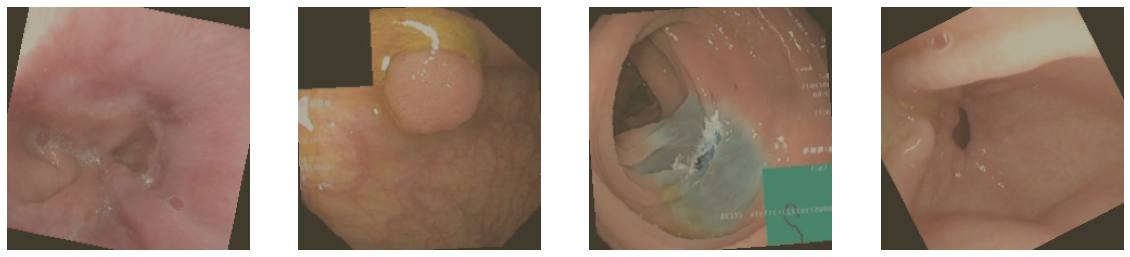

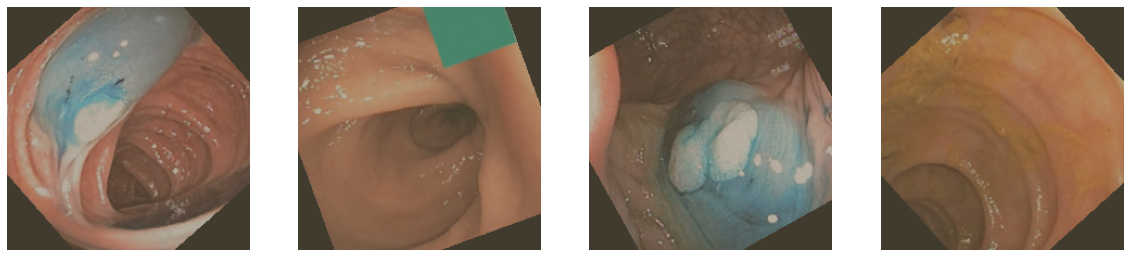

In [20]:
config = get_config('./configs/local_reproduce.yaml')
df_anno = pd.read_csv(config['DATA']['ANNO'])
df_unanno = None
train_dl, valid_dl, mixup_fn = get_data(config, df_anno, df_unanno, is_visual=True, is_reprod =True)
model = build_model(config, is_pathology = True)

### Supervised Learning Abnormalities

In [8]:
# config = get_config('./configs/kaggle_supervised_abnorm.yaml')
# df_anno = pd.read_csv(config['DATA']['ANNO'])
# df_unanno = pd.read_csv(config['DATA']['UNANNO'])
# train_dl, valid_dl = get_data(config, 
#                               df_anno, 
#                               df_unanno, 
# #                               is_full_sup = False, 
#                               is_visual=True)

# ## generate prediction abnormalities
# unlabeled_dl = get_data(config, df_anno, df_unanno, is_visual=True, predict = True)
# model = build_model(config, is_pathology = False)

### Supervised Learning Pathologies

Training mode: Full labeled supervised learning
Selected model: resnet50 w/ Triplet


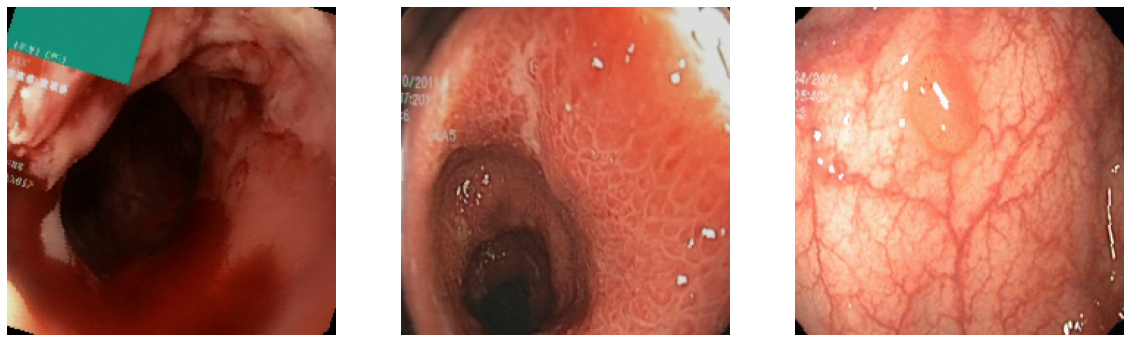

In [9]:
# config = get_config('./configs/local_supervised.yaml')
# df_anno = pd.read_csv(config['DATA']['ANNO'])
# df_unanno = None
# train_dl, valid_dl, mixup_fn = get_data(config, df_anno, df_unanno, is_visual=True)
# model = build_model(config, is_pathology = True)

### Semi-supervised Learning

In [10]:
# config = get_config('./configs/kaggle_semisupervised_real_1.yaml')
# df_anno = pd.read_csv(config['DATA']['ANNO'])
# df_unanno = pd.read_csv(config['DATA']['UNANNO'])
# train_dl, valid_dl = get_data(config, 
#                               df_anno, 
#                               df_unanno, 
#                               is_full_sup = False, 
#                               is_visual=True, 
#                               type_semi = config.MODEL.TYPE_SEMI)

# model = build_model(config, is_pathology = True)

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [21]:
if config.TRAIN.IS_SSL:
    if config.MODEL.TYPE_SEMI == 'FixMatch':
        classifier = FixMatch(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
    elif config.MODEL.TYPE_SEMI == 'CoMatch':
        classifier = CoMatch(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
    elif config.MODEL.TYPE_SEMI == 'SemiFormer':
        classifier = SemiFormer(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
else:
    classifier = SupLearning(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
    
classifier.get_dataloader(train_dl, valid_dl, mixup_fn)
classifier.get_config(config)

Training mode: Supervised Learning


In [13]:
# classifier.fit()

In [22]:
classifier.load_checkpoint('D:\\model\\endoscopy\\hyper_kvasir\\reproduce_paper\\06_20_2022_22_00_59_epoch_25_split01.pth')

RuntimeError: Error(s) in loading state_dict for DenseNet:
	Missing key(s) in state_dict: "features.conv0.weight", "features.norm0.weight", "features.norm0.bias", "features.norm0.running_mean", "features.norm0.running_var", "features.denseblock1.denselayer1.norm1.weight", "features.denseblock1.denselayer1.norm1.bias", "features.denseblock1.denselayer1.norm1.running_mean", "features.denseblock1.denselayer1.norm1.running_var", "features.denseblock1.denselayer1.conv1.weight", "features.denseblock1.denselayer1.norm2.weight", "features.denseblock1.denselayer1.norm2.bias", "features.denseblock1.denselayer1.norm2.running_mean", "features.denseblock1.denselayer1.norm2.running_var", "features.denseblock1.denselayer1.conv2.weight", "features.denseblock1.denselayer2.norm1.weight", "features.denseblock1.denselayer2.norm1.bias", "features.denseblock1.denselayer2.norm1.running_mean", "features.denseblock1.denselayer2.norm1.running_var", "features.denseblock1.denselayer2.conv1.weight", "features.denseblock1.denselayer2.norm2.weight", "features.denseblock1.denselayer2.norm2.bias", "features.denseblock1.denselayer2.norm2.running_mean", "features.denseblock1.denselayer2.norm2.running_var", "features.denseblock1.denselayer2.conv2.weight", "features.denseblock1.denselayer3.norm1.weight", "features.denseblock1.denselayer3.norm1.bias", "features.denseblock1.denselayer3.norm1.running_mean", "features.denseblock1.denselayer3.norm1.running_var", "features.denseblock1.denselayer3.conv1.weight", "features.denseblock1.denselayer3.norm2.weight", "features.denseblock1.denselayer3.norm2.bias", "features.denseblock1.denselayer3.norm2.running_mean", "features.denseblock1.denselayer3.norm2.running_var", "features.denseblock1.denselayer3.conv2.weight", "features.denseblock1.denselayer4.norm1.weight", "features.denseblock1.denselayer4.norm1.bias", "features.denseblock1.denselayer4.norm1.running_mean", "features.denseblock1.denselayer4.norm1.running_var", "features.denseblock1.denselayer4.conv1.weight", "features.denseblock1.denselayer4.norm2.weight", "features.denseblock1.denselayer4.norm2.bias", "features.denseblock1.denselayer4.norm2.running_mean", "features.denseblock1.denselayer4.norm2.running_var", "features.denseblock1.denselayer4.conv2.weight", "features.denseblock1.denselayer5.norm1.weight", "features.denseblock1.denselayer5.norm1.bias", "features.denseblock1.denselayer5.norm1.running_mean", "features.denseblock1.denselayer5.norm1.running_var", "features.denseblock1.denselayer5.conv1.weight", "features.denseblock1.denselayer5.norm2.weight", "features.denseblock1.denselayer5.norm2.bias", "features.denseblock1.denselayer5.norm2.running_mean", "features.denseblock1.denselayer5.norm2.running_var", "features.denseblock1.denselayer5.conv2.weight", "features.denseblock1.denselayer6.norm1.weight", "features.denseblock1.denselayer6.norm1.bias", "features.denseblock1.denselayer6.norm1.running_mean", "features.denseblock1.denselayer6.norm1.running_var", "features.denseblock1.denselayer6.conv1.weight", "features.denseblock1.denselayer6.norm2.weight", "features.denseblock1.denselayer6.norm2.bias", "features.denseblock1.denselayer6.norm2.running_mean", "features.denseblock1.denselayer6.norm2.running_var", "features.denseblock1.denselayer6.conv2.weight", "features.transition1.norm.weight", "features.transition1.norm.bias", "features.transition1.norm.running_mean", "features.transition1.norm.running_var", "features.transition1.conv.weight", "features.denseblock2.denselayer1.norm1.weight", "features.denseblock2.denselayer1.norm1.bias", "features.denseblock2.denselayer1.norm1.running_mean", "features.denseblock2.denselayer1.norm1.running_var", "features.denseblock2.denselayer1.conv1.weight", "features.denseblock2.denselayer1.norm2.weight", "features.denseblock2.denselayer1.norm2.bias", "features.denseblock2.denselayer1.norm2.running_mean", "features.denseblock2.denselayer1.norm2.running_var", "features.denseblock2.denselayer1.conv2.weight", "features.denseblock2.denselayer2.norm1.weight", "features.denseblock2.denselayer2.norm1.bias", "features.denseblock2.denselayer2.norm1.running_mean", "features.denseblock2.denselayer2.norm1.running_var", "features.denseblock2.denselayer2.conv1.weight", "features.denseblock2.denselayer2.norm2.weight", "features.denseblock2.denselayer2.norm2.bias", "features.denseblock2.denselayer2.norm2.running_mean", "features.denseblock2.denselayer2.norm2.running_var", "features.denseblock2.denselayer2.conv2.weight", "features.denseblock2.denselayer3.norm1.weight", "features.denseblock2.denselayer3.norm1.bias", "features.denseblock2.denselayer3.norm1.running_mean", "features.denseblock2.denselayer3.norm1.running_var", "features.denseblock2.denselayer3.conv1.weight", "features.denseblock2.denselayer3.norm2.weight", "features.denseblock2.denselayer3.norm2.bias", "features.denseblock2.denselayer3.norm2.running_mean", "features.denseblock2.denselayer3.norm2.running_var", "features.denseblock2.denselayer3.conv2.weight", "features.denseblock2.denselayer4.norm1.weight", "features.denseblock2.denselayer4.norm1.bias", "features.denseblock2.denselayer4.norm1.running_mean", "features.denseblock2.denselayer4.norm1.running_var", "features.denseblock2.denselayer4.conv1.weight", "features.denseblock2.denselayer4.norm2.weight", "features.denseblock2.denselayer4.norm2.bias", "features.denseblock2.denselayer4.norm2.running_mean", "features.denseblock2.denselayer4.norm2.running_var", "features.denseblock2.denselayer4.conv2.weight", "features.denseblock2.denselayer5.norm1.weight", "features.denseblock2.denselayer5.norm1.bias", "features.denseblock2.denselayer5.norm1.running_mean", "features.denseblock2.denselayer5.norm1.running_var", "features.denseblock2.denselayer5.conv1.weight", "features.denseblock2.denselayer5.norm2.weight", "features.denseblock2.denselayer5.norm2.bias", "features.denseblock2.denselayer5.norm2.running_mean", "features.denseblock2.denselayer5.norm2.running_var", "features.denseblock2.denselayer5.conv2.weight", "features.denseblock2.denselayer6.norm1.weight", "features.denseblock2.denselayer6.norm1.bias", "features.denseblock2.denselayer6.norm1.running_mean", "features.denseblock2.denselayer6.norm1.running_var", "features.denseblock2.denselayer6.conv1.weight", "features.denseblock2.denselayer6.norm2.weight", "features.denseblock2.denselayer6.norm2.bias", "features.denseblock2.denselayer6.norm2.running_mean", "features.denseblock2.denselayer6.norm2.running_var", "features.denseblock2.denselayer6.conv2.weight", "features.denseblock2.denselayer7.norm1.weight", "features.denseblock2.denselayer7.norm1.bias", "features.denseblock2.denselayer7.norm1.running_mean", "features.denseblock2.denselayer7.norm1.running_var", "features.denseblock2.denselayer7.conv1.weight", "features.denseblock2.denselayer7.norm2.weight", "features.denseblock2.denselayer7.norm2.bias", "features.denseblock2.denselayer7.norm2.running_mean", "features.denseblock2.denselayer7.norm2.running_var", "features.denseblock2.denselayer7.conv2.weight", "features.denseblock2.denselayer8.norm1.weight", "features.denseblock2.denselayer8.norm1.bias", "features.denseblock2.denselayer8.norm1.running_mean", "features.denseblock2.denselayer8.norm1.running_var", "features.denseblock2.denselayer8.conv1.weight", "features.denseblock2.denselayer8.norm2.weight", "features.denseblock2.denselayer8.norm2.bias", "features.denseblock2.denselayer8.norm2.running_mean", "features.denseblock2.denselayer8.norm2.running_var", "features.denseblock2.denselayer8.conv2.weight", "features.denseblock2.denselayer9.norm1.weight", "features.denseblock2.denselayer9.norm1.bias", "features.denseblock2.denselayer9.norm1.running_mean", "features.denseblock2.denselayer9.norm1.running_var", "features.denseblock2.denselayer9.conv1.weight", "features.denseblock2.denselayer9.norm2.weight", "features.denseblock2.denselayer9.norm2.bias", "features.denseblock2.denselayer9.norm2.running_mean", "features.denseblock2.denselayer9.norm2.running_var", "features.denseblock2.denselayer9.conv2.weight", "features.denseblock2.denselayer10.norm1.weight", "features.denseblock2.denselayer10.norm1.bias", "features.denseblock2.denselayer10.norm1.running_mean", "features.denseblock2.denselayer10.norm1.running_var", "features.denseblock2.denselayer10.conv1.weight", "features.denseblock2.denselayer10.norm2.weight", "features.denseblock2.denselayer10.norm2.bias", "features.denseblock2.denselayer10.norm2.running_mean", "features.denseblock2.denselayer10.norm2.running_var", "features.denseblock2.denselayer10.conv2.weight", "features.denseblock2.denselayer11.norm1.weight", "features.denseblock2.denselayer11.norm1.bias", "features.denseblock2.denselayer11.norm1.running_mean", "features.denseblock2.denselayer11.norm1.running_var", "features.denseblock2.denselayer11.conv1.weight", "features.denseblock2.denselayer11.norm2.weight", "features.denseblock2.denselayer11.norm2.bias", "features.denseblock2.denselayer11.norm2.running_mean", "features.denseblock2.denselayer11.norm2.running_var", "features.denseblock2.denselayer11.conv2.weight", "features.denseblock2.denselayer12.norm1.weight", "features.denseblock2.denselayer12.norm1.bias", "features.denseblock2.denselayer12.norm1.running_mean", "features.denseblock2.denselayer12.norm1.running_var", "features.denseblock2.denselayer12.conv1.weight", "features.denseblock2.denselayer12.norm2.weight", "features.denseblock2.denselayer12.norm2.bias", "features.denseblock2.denselayer12.norm2.running_mean", "features.denseblock2.denselayer12.norm2.running_var", "features.denseblock2.denselayer12.conv2.weight", "features.transition2.norm.weight", "features.transition2.norm.bias", "features.transition2.norm.running_mean", "features.transition2.norm.running_var", "features.transition2.conv.weight", "features.denseblock3.denselayer1.norm1.weight", "features.denseblock3.denselayer1.norm1.bias", "features.denseblock3.denselayer1.norm1.running_mean", "features.denseblock3.denselayer1.norm1.running_var", "features.denseblock3.denselayer1.conv1.weight", "features.denseblock3.denselayer1.norm2.weight", "features.denseblock3.denselayer1.norm2.bias", "features.denseblock3.denselayer1.norm2.running_mean", "features.denseblock3.denselayer1.norm2.running_var", "features.denseblock3.denselayer1.conv2.weight", "features.denseblock3.denselayer2.norm1.weight", "features.denseblock3.denselayer2.norm1.bias", "features.denseblock3.denselayer2.norm1.running_mean", "features.denseblock3.denselayer2.norm1.running_var", "features.denseblock3.denselayer2.conv1.weight", "features.denseblock3.denselayer2.norm2.weight", "features.denseblock3.denselayer2.norm2.bias", "features.denseblock3.denselayer2.norm2.running_mean", "features.denseblock3.denselayer2.norm2.running_var", "features.denseblock3.denselayer2.conv2.weight", "features.denseblock3.denselayer3.norm1.weight", "features.denseblock3.denselayer3.norm1.bias", "features.denseblock3.denselayer3.norm1.running_mean", "features.denseblock3.denselayer3.norm1.running_var", "features.denseblock3.denselayer3.conv1.weight", "features.denseblock3.denselayer3.norm2.weight", "features.denseblock3.denselayer3.norm2.bias", "features.denseblock3.denselayer3.norm2.running_mean", "features.denseblock3.denselayer3.norm2.running_var", "features.denseblock3.denselayer3.conv2.weight", "features.denseblock3.denselayer4.norm1.weight", "features.denseblock3.denselayer4.norm1.bias", "features.denseblock3.denselayer4.norm1.running_mean", "features.denseblock3.denselayer4.norm1.running_var", "features.denseblock3.denselayer4.conv1.weight", "features.denseblock3.denselayer4.norm2.weight", "features.denseblock3.denselayer4.norm2.bias", "features.denseblock3.denselayer4.norm2.running_mean", "features.denseblock3.denselayer4.norm2.running_var", "features.denseblock3.denselayer4.conv2.weight", "features.denseblock3.denselayer5.norm1.weight", "features.denseblock3.denselayer5.norm1.bias", "features.denseblock3.denselayer5.norm1.running_mean", "features.denseblock3.denselayer5.norm1.running_var", "features.denseblock3.denselayer5.conv1.weight", "features.denseblock3.denselayer5.norm2.weight", "features.denseblock3.denselayer5.norm2.bias", "features.denseblock3.denselayer5.norm2.running_mean", "features.denseblock3.denselayer5.norm2.running_var", "features.denseblock3.denselayer5.conv2.weight", "features.denseblock3.denselayer6.norm1.weight", "features.denseblock3.denselayer6.norm1.bias", "features.denseblock3.denselayer6.norm1.running_mean", "features.denseblock3.denselayer6.norm1.running_var", "features.denseblock3.denselayer6.conv1.weight", "features.denseblock3.denselayer6.norm2.weight", "features.denseblock3.denselayer6.norm2.bias", "features.denseblock3.denselayer6.norm2.running_mean", "features.denseblock3.denselayer6.norm2.running_var", "features.denseblock3.denselayer6.conv2.weight", "features.denseblock3.denselayer7.norm1.weight", "features.denseblock3.denselayer7.norm1.bias", "features.denseblock3.denselayer7.norm1.running_mean", "features.denseblock3.denselayer7.norm1.running_var", "features.denseblock3.denselayer7.conv1.weight", "features.denseblock3.denselayer7.norm2.weight", "features.denseblock3.denselayer7.norm2.bias", "features.denseblock3.denselayer7.norm2.running_mean", "features.denseblock3.denselayer7.norm2.running_var", "features.denseblock3.denselayer7.conv2.weight", "features.denseblock3.denselayer8.norm1.weight", "features.denseblock3.denselayer8.norm1.bias", "features.denseblock3.denselayer8.norm1.running_mean", "features.denseblock3.denselayer8.norm1.running_var", "features.denseblock3.denselayer8.conv1.weight", "features.denseblock3.denselayer8.norm2.weight", "features.denseblock3.denselayer8.norm2.bias", "features.denseblock3.denselayer8.norm2.running_mean", "features.denseblock3.denselayer8.norm2.running_var", "features.denseblock3.denselayer8.conv2.weight", "features.denseblock3.denselayer9.norm1.weight", "features.denseblock3.denselayer9.norm1.bias", "features.denseblock3.denselayer9.norm1.running_mean", "features.denseblock3.denselayer9.norm1.running_var", "features.denseblock3.denselayer9.conv1.weight", "features.denseblock3.denselayer9.norm2.weight", "features.denseblock3.denselayer9.norm2.bias", "features.denseblock3.denselayer9.norm2.running_mean", "features.denseblock3.denselayer9.norm2.running_var", "features.denseblock3.denselayer9.conv2.weight", "features.denseblock3.denselayer10.norm1.weight", "features.denseblock3.denselayer10.norm1.bias", "features.denseblock3.denselayer10.norm1.running_mean", "features.denseblock3.denselayer10.norm1.running_var", "features.denseblock3.denselayer10.conv1.weight", "features.denseblock3.denselayer10.norm2.weight", "features.denseblock3.denselayer10.norm2.bias", "features.denseblock3.denselayer10.norm2.running_mean", "features.denseblock3.denselayer10.norm2.running_var", "features.denseblock3.denselayer10.conv2.weight", "features.denseblock3.denselayer11.norm1.weight", "features.denseblock3.denselayer11.norm1.bias", "features.denseblock3.denselayer11.norm1.running_mean", "features.denseblock3.denselayer11.norm1.running_var", "features.denseblock3.denselayer11.conv1.weight", "features.denseblock3.denselayer11.norm2.weight", "features.denseblock3.denselayer11.norm2.bias", "features.denseblock3.denselayer11.norm2.running_mean", "features.denseblock3.denselayer11.norm2.running_var", "features.denseblock3.denselayer11.conv2.weight", "features.denseblock3.denselayer12.norm1.weight", "features.denseblock3.denselayer12.norm1.bias", "features.denseblock3.denselayer12.norm1.running_mean", "features.denseblock3.denselayer12.norm1.running_var", "features.denseblock3.denselayer12.conv1.weight", "features.denseblock3.denselayer12.norm2.weight", "features.denseblock3.denselayer12.norm2.bias", "features.denseblock3.denselayer12.norm2.running_mean", "features.denseblock3.denselayer12.norm2.running_var", "features.denseblock3.denselayer12.conv2.weight", "features.denseblock3.denselayer13.norm1.weight", "features.denseblock3.denselayer13.norm1.bias", "features.denseblock3.denselayer13.norm1.running_mean", "features.denseblock3.denselayer13.norm1.running_var", "features.denseblock3.denselayer13.conv1.weight", "features.denseblock3.denselayer13.norm2.weight", "features.denseblock3.denselayer13.norm2.bias", "features.denseblock3.denselayer13.norm2.running_mean", "features.denseblock3.denselayer13.norm2.running_var", "features.denseblock3.denselayer13.conv2.weight", "features.denseblock3.denselayer14.norm1.weight", "features.denseblock3.denselayer14.norm1.bias", "features.denseblock3.denselayer14.norm1.running_mean", "features.denseblock3.denselayer14.norm1.running_var", "features.denseblock3.denselayer14.conv1.weight", "features.denseblock3.denselayer14.norm2.weight", "features.denseblock3.denselayer14.norm2.bias", "features.denseblock3.denselayer14.norm2.running_mean", "features.denseblock3.denselayer14.norm2.running_var", "features.denseblock3.denselayer14.conv2.weight", "features.denseblock3.denselayer15.norm1.weight", "features.denseblock3.denselayer15.norm1.bias", "features.denseblock3.denselayer15.norm1.running_mean", "features.denseblock3.denselayer15.norm1.running_var", "features.denseblock3.denselayer15.conv1.weight", "features.denseblock3.denselayer15.norm2.weight", "features.denseblock3.denselayer15.norm2.bias", "features.denseblock3.denselayer15.norm2.running_mean", "features.denseblock3.denselayer15.norm2.running_var", "features.denseblock3.denselayer15.conv2.weight", "features.denseblock3.denselayer16.norm1.weight", "features.denseblock3.denselayer16.norm1.bias", "features.denseblock3.denselayer16.norm1.running_mean", "features.denseblock3.denselayer16.norm1.running_var", "features.denseblock3.denselayer16.conv1.weight", "features.denseblock3.denselayer16.norm2.weight", "features.denseblock3.denselayer16.norm2.bias", "features.denseblock3.denselayer16.norm2.running_mean", "features.denseblock3.denselayer16.norm2.running_var", "features.denseblock3.denselayer16.conv2.weight", "features.denseblock3.denselayer17.norm1.weight", "features.denseblock3.denselayer17.norm1.bias", "features.denseblock3.denselayer17.norm1.running_mean", "features.denseblock3.denselayer17.norm1.running_var", "features.denseblock3.denselayer17.conv1.weight", "features.denseblock3.denselayer17.norm2.weight", "features.denseblock3.denselayer17.norm2.bias", "features.denseblock3.denselayer17.norm2.running_mean", "features.denseblock3.denselayer17.norm2.running_var", "features.denseblock3.denselayer17.conv2.weight", "features.denseblock3.denselayer18.norm1.weight", "features.denseblock3.denselayer18.norm1.bias", "features.denseblock3.denselayer18.norm1.running_mean", "features.denseblock3.denselayer18.norm1.running_var", "features.denseblock3.denselayer18.conv1.weight", "features.denseblock3.denselayer18.norm2.weight", "features.denseblock3.denselayer18.norm2.bias", "features.denseblock3.denselayer18.norm2.running_mean", "features.denseblock3.denselayer18.norm2.running_var", "features.denseblock3.denselayer18.conv2.weight", "features.denseblock3.denselayer19.norm1.weight", "features.denseblock3.denselayer19.norm1.bias", "features.denseblock3.denselayer19.norm1.running_mean", "features.denseblock3.denselayer19.norm1.running_var", "features.denseblock3.denselayer19.conv1.weight", "features.denseblock3.denselayer19.norm2.weight", "features.denseblock3.denselayer19.norm2.bias", "features.denseblock3.denselayer19.norm2.running_mean", "features.denseblock3.denselayer19.norm2.running_var", "features.denseblock3.denselayer19.conv2.weight", "features.denseblock3.denselayer20.norm1.weight", "features.denseblock3.denselayer20.norm1.bias", "features.denseblock3.denselayer20.norm1.running_mean", "features.denseblock3.denselayer20.norm1.running_var", "features.denseblock3.denselayer20.conv1.weight", "features.denseblock3.denselayer20.norm2.weight", "features.denseblock3.denselayer20.norm2.bias", "features.denseblock3.denselayer20.norm2.running_mean", "features.denseblock3.denselayer20.norm2.running_var", "features.denseblock3.denselayer20.conv2.weight", "features.denseblock3.denselayer21.norm1.weight", "features.denseblock3.denselayer21.norm1.bias", "features.denseblock3.denselayer21.norm1.running_mean", "features.denseblock3.denselayer21.norm1.running_var", "features.denseblock3.denselayer21.conv1.weight", "features.denseblock3.denselayer21.norm2.weight", "features.denseblock3.denselayer21.norm2.bias", "features.denseblock3.denselayer21.norm2.running_mean", "features.denseblock3.denselayer21.norm2.running_var", "features.denseblock3.denselayer21.conv2.weight", "features.denseblock3.denselayer22.norm1.weight", "features.denseblock3.denselayer22.norm1.bias", "features.denseblock3.denselayer22.norm1.running_mean", "features.denseblock3.denselayer22.norm1.running_var", "features.denseblock3.denselayer22.conv1.weight", "features.denseblock3.denselayer22.norm2.weight", "features.denseblock3.denselayer22.norm2.bias", "features.denseblock3.denselayer22.norm2.running_mean", "features.denseblock3.denselayer22.norm2.running_var", "features.denseblock3.denselayer22.conv2.weight", "features.denseblock3.denselayer23.norm1.weight", "features.denseblock3.denselayer23.norm1.bias", "features.denseblock3.denselayer23.norm1.running_mean", "features.denseblock3.denselayer23.norm1.running_var", "features.denseblock3.denselayer23.conv1.weight", "features.denseblock3.denselayer23.norm2.weight", "features.denseblock3.denselayer23.norm2.bias", "features.denseblock3.denselayer23.norm2.running_mean", "features.denseblock3.denselayer23.norm2.running_var", "features.denseblock3.denselayer23.conv2.weight", "features.denseblock3.denselayer24.norm1.weight", "features.denseblock3.denselayer24.norm1.bias", "features.denseblock3.denselayer24.norm1.running_mean", "features.denseblock3.denselayer24.norm1.running_var", "features.denseblock3.denselayer24.conv1.weight", "features.denseblock3.denselayer24.norm2.weight", "features.denseblock3.denselayer24.norm2.bias", "features.denseblock3.denselayer24.norm2.running_mean", "features.denseblock3.denselayer24.norm2.running_var", "features.denseblock3.denselayer24.conv2.weight", "features.denseblock3.denselayer25.norm1.weight", "features.denseblock3.denselayer25.norm1.bias", "features.denseblock3.denselayer25.norm1.running_mean", "features.denseblock3.denselayer25.norm1.running_var", "features.denseblock3.denselayer25.conv1.weight", "features.denseblock3.denselayer25.norm2.weight", "features.denseblock3.denselayer25.norm2.bias", "features.denseblock3.denselayer25.norm2.running_mean", "features.denseblock3.denselayer25.norm2.running_var", "features.denseblock3.denselayer25.conv2.weight", "features.denseblock3.denselayer26.norm1.weight", "features.denseblock3.denselayer26.norm1.bias", "features.denseblock3.denselayer26.norm1.running_mean", "features.denseblock3.denselayer26.norm1.running_var", "features.denseblock3.denselayer26.conv1.weight", "features.denseblock3.denselayer26.norm2.weight", "features.denseblock3.denselayer26.norm2.bias", "features.denseblock3.denselayer26.norm2.running_mean", "features.denseblock3.denselayer26.norm2.running_var", "features.denseblock3.denselayer26.conv2.weight", "features.denseblock3.denselayer27.norm1.weight", "features.denseblock3.denselayer27.norm1.bias", "features.denseblock3.denselayer27.norm1.running_mean", "features.denseblock3.denselayer27.norm1.running_var", "features.denseblock3.denselayer27.conv1.weight", "features.denseblock3.denselayer27.norm2.weight", "features.denseblock3.denselayer27.norm2.bias", "features.denseblock3.denselayer27.norm2.running_mean", "features.denseblock3.denselayer27.norm2.running_var", "features.denseblock3.denselayer27.conv2.weight", "features.denseblock3.denselayer28.norm1.weight", "features.denseblock3.denselayer28.norm1.bias", "features.denseblock3.denselayer28.norm1.running_mean", "features.denseblock3.denselayer28.norm1.running_var", "features.denseblock3.denselayer28.conv1.weight", "features.denseblock3.denselayer28.norm2.weight", "features.denseblock3.denselayer28.norm2.bias", "features.denseblock3.denselayer28.norm2.running_mean", "features.denseblock3.denselayer28.norm2.running_var", "features.denseblock3.denselayer28.conv2.weight", "features.denseblock3.denselayer29.norm1.weight", "features.denseblock3.denselayer29.norm1.bias", "features.denseblock3.denselayer29.norm1.running_mean", "features.denseblock3.denselayer29.norm1.running_var", "features.denseblock3.denselayer29.conv1.weight", "features.denseblock3.denselayer29.norm2.weight", "features.denseblock3.denselayer29.norm2.bias", "features.denseblock3.denselayer29.norm2.running_mean", "features.denseblock3.denselayer29.norm2.running_var", "features.denseblock3.denselayer29.conv2.weight", "features.denseblock3.denselayer30.norm1.weight", "features.denseblock3.denselayer30.norm1.bias", "features.denseblock3.denselayer30.norm1.running_mean", "features.denseblock3.denselayer30.norm1.running_var", "features.denseblock3.denselayer30.conv1.weight", "features.denseblock3.denselayer30.norm2.weight", "features.denseblock3.denselayer30.norm2.bias", "features.denseblock3.denselayer30.norm2.running_mean", "features.denseblock3.denselayer30.norm2.running_var", "features.denseblock3.denselayer30.conv2.weight", "features.denseblock3.denselayer31.norm1.weight", "features.denseblock3.denselayer31.norm1.bias", "features.denseblock3.denselayer31.norm1.running_mean", "features.denseblock3.denselayer31.norm1.running_var", "features.denseblock3.denselayer31.conv1.weight", "features.denseblock3.denselayer31.norm2.weight", "features.denseblock3.denselayer31.norm2.bias", "features.denseblock3.denselayer31.norm2.running_mean", "features.denseblock3.denselayer31.norm2.running_var", "features.denseblock3.denselayer31.conv2.weight", "features.denseblock3.denselayer32.norm1.weight", "features.denseblock3.denselayer32.norm1.bias", "features.denseblock3.denselayer32.norm1.running_mean", "features.denseblock3.denselayer32.norm1.running_var", "features.denseblock3.denselayer32.conv1.weight", "features.denseblock3.denselayer32.norm2.weight", "features.denseblock3.denselayer32.norm2.bias", "features.denseblock3.denselayer32.norm2.running_mean", "features.denseblock3.denselayer32.norm2.running_var", "features.denseblock3.denselayer32.conv2.weight", "features.denseblock3.denselayer33.norm1.weight", "features.denseblock3.denselayer33.norm1.bias", "features.denseblock3.denselayer33.norm1.running_mean", "features.denseblock3.denselayer33.norm1.running_var", "features.denseblock3.denselayer33.conv1.weight", "features.denseblock3.denselayer33.norm2.weight", "features.denseblock3.denselayer33.norm2.bias", "features.denseblock3.denselayer33.norm2.running_mean", "features.denseblock3.denselayer33.norm2.running_var", "features.denseblock3.denselayer33.conv2.weight", "features.denseblock3.denselayer34.norm1.weight", "features.denseblock3.denselayer34.norm1.bias", "features.denseblock3.denselayer34.norm1.running_mean", "features.denseblock3.denselayer34.norm1.running_var", "features.denseblock3.denselayer34.conv1.weight", "features.denseblock3.denselayer34.norm2.weight", "features.denseblock3.denselayer34.norm2.bias", "features.denseblock3.denselayer34.norm2.running_mean", "features.denseblock3.denselayer34.norm2.running_var", "features.denseblock3.denselayer34.conv2.weight", "features.denseblock3.denselayer35.norm1.weight", "features.denseblock3.denselayer35.norm1.bias", "features.denseblock3.denselayer35.norm1.running_mean", "features.denseblock3.denselayer35.norm1.running_var", "features.denseblock3.denselayer35.conv1.weight", "features.denseblock3.denselayer35.norm2.weight", "features.denseblock3.denselayer35.norm2.bias", "features.denseblock3.denselayer35.norm2.running_mean", "features.denseblock3.denselayer35.norm2.running_var", "features.denseblock3.denselayer35.conv2.weight", "features.denseblock3.denselayer36.norm1.weight", "features.denseblock3.denselayer36.norm1.bias", "features.denseblock3.denselayer36.norm1.running_mean", "features.denseblock3.denselayer36.norm1.running_var", "features.denseblock3.denselayer36.conv1.weight", "features.denseblock3.denselayer36.norm2.weight", "features.denseblock3.denselayer36.norm2.bias", "features.denseblock3.denselayer36.norm2.running_mean", "features.denseblock3.denselayer36.norm2.running_var", "features.denseblock3.denselayer36.conv2.weight", "features.transition3.norm.weight", "features.transition3.norm.bias", "features.transition3.norm.running_mean", "features.transition3.norm.running_var", "features.transition3.conv.weight", "features.denseblock4.denselayer1.norm1.weight", "features.denseblock4.denselayer1.norm1.bias", "features.denseblock4.denselayer1.norm1.running_mean", "features.denseblock4.denselayer1.norm1.running_var", "features.denseblock4.denselayer1.conv1.weight", "features.denseblock4.denselayer1.norm2.weight", "features.denseblock4.denselayer1.norm2.bias", "features.denseblock4.denselayer1.norm2.running_mean", "features.denseblock4.denselayer1.norm2.running_var", "features.denseblock4.denselayer1.conv2.weight", "features.denseblock4.denselayer2.norm1.weight", "features.denseblock4.denselayer2.norm1.bias", "features.denseblock4.denselayer2.norm1.running_mean", "features.denseblock4.denselayer2.norm1.running_var", "features.denseblock4.denselayer2.conv1.weight", "features.denseblock4.denselayer2.norm2.weight", "features.denseblock4.denselayer2.norm2.bias", "features.denseblock4.denselayer2.norm2.running_mean", "features.denseblock4.denselayer2.norm2.running_var", "features.denseblock4.denselayer2.conv2.weight", "features.denseblock4.denselayer3.norm1.weight", "features.denseblock4.denselayer3.norm1.bias", "features.denseblock4.denselayer3.norm1.running_mean", "features.denseblock4.denselayer3.norm1.running_var", "features.denseblock4.denselayer3.conv1.weight", "features.denseblock4.denselayer3.norm2.weight", "features.denseblock4.denselayer3.norm2.bias", "features.denseblock4.denselayer3.norm2.running_mean", "features.denseblock4.denselayer3.norm2.running_var", "features.denseblock4.denselayer3.conv2.weight", "features.denseblock4.denselayer4.norm1.weight", "features.denseblock4.denselayer4.norm1.bias", "features.denseblock4.denselayer4.norm1.running_mean", "features.denseblock4.denselayer4.norm1.running_var", "features.denseblock4.denselayer4.conv1.weight", "features.denseblock4.denselayer4.norm2.weight", "features.denseblock4.denselayer4.norm2.bias", "features.denseblock4.denselayer4.norm2.running_mean", "features.denseblock4.denselayer4.norm2.running_var", "features.denseblock4.denselayer4.conv2.weight", "features.denseblock4.denselayer5.norm1.weight", "features.denseblock4.denselayer5.norm1.bias", "features.denseblock4.denselayer5.norm1.running_mean", "features.denseblock4.denselayer5.norm1.running_var", "features.denseblock4.denselayer5.conv1.weight", "features.denseblock4.denselayer5.norm2.weight", "features.denseblock4.denselayer5.norm2.bias", "features.denseblock4.denselayer5.norm2.running_mean", "features.denseblock4.denselayer5.norm2.running_var", "features.denseblock4.denselayer5.conv2.weight", "features.denseblock4.denselayer6.norm1.weight", "features.denseblock4.denselayer6.norm1.bias", "features.denseblock4.denselayer6.norm1.running_mean", "features.denseblock4.denselayer6.norm1.running_var", "features.denseblock4.denselayer6.conv1.weight", "features.denseblock4.denselayer6.norm2.weight", "features.denseblock4.denselayer6.norm2.bias", "features.denseblock4.denselayer6.norm2.running_mean", "features.denseblock4.denselayer6.norm2.running_var", "features.denseblock4.denselayer6.conv2.weight", "features.denseblock4.denselayer7.norm1.weight", "features.denseblock4.denselayer7.norm1.bias", "features.denseblock4.denselayer7.norm1.running_mean", "features.denseblock4.denselayer7.norm1.running_var", "features.denseblock4.denselayer7.conv1.weight", "features.denseblock4.denselayer7.norm2.weight", "features.denseblock4.denselayer7.norm2.bias", "features.denseblock4.denselayer7.norm2.running_mean", "features.denseblock4.denselayer7.norm2.running_var", "features.denseblock4.denselayer7.conv2.weight", "features.denseblock4.denselayer8.norm1.weight", "features.denseblock4.denselayer8.norm1.bias", "features.denseblock4.denselayer8.norm1.running_mean", "features.denseblock4.denselayer8.norm1.running_var", "features.denseblock4.denselayer8.conv1.weight", "features.denseblock4.denselayer8.norm2.weight", "features.denseblock4.denselayer8.norm2.bias", "features.denseblock4.denselayer8.norm2.running_mean", "features.denseblock4.denselayer8.norm2.running_var", "features.denseblock4.denselayer8.conv2.weight", "features.denseblock4.denselayer9.norm1.weight", "features.denseblock4.denselayer9.norm1.bias", "features.denseblock4.denselayer9.norm1.running_mean", "features.denseblock4.denselayer9.norm1.running_var", "features.denseblock4.denselayer9.conv1.weight", "features.denseblock4.denselayer9.norm2.weight", "features.denseblock4.denselayer9.norm2.bias", "features.denseblock4.denselayer9.norm2.running_mean", "features.denseblock4.denselayer9.norm2.running_var", "features.denseblock4.denselayer9.conv2.weight", "features.denseblock4.denselayer10.norm1.weight", "features.denseblock4.denselayer10.norm1.bias", "features.denseblock4.denselayer10.norm1.running_mean", "features.denseblock4.denselayer10.norm1.running_var", "features.denseblock4.denselayer10.conv1.weight", "features.denseblock4.denselayer10.norm2.weight", "features.denseblock4.denselayer10.norm2.bias", "features.denseblock4.denselayer10.norm2.running_mean", "features.denseblock4.denselayer10.norm2.running_var", "features.denseblock4.denselayer10.conv2.weight", "features.denseblock4.denselayer11.norm1.weight", "features.denseblock4.denselayer11.norm1.bias", "features.denseblock4.denselayer11.norm1.running_mean", "features.denseblock4.denselayer11.norm1.running_var", "features.denseblock4.denselayer11.conv1.weight", "features.denseblock4.denselayer11.norm2.weight", "features.denseblock4.denselayer11.norm2.bias", "features.denseblock4.denselayer11.norm2.running_mean", "features.denseblock4.denselayer11.norm2.running_var", "features.denseblock4.denselayer11.conv2.weight", "features.denseblock4.denselayer12.norm1.weight", "features.denseblock4.denselayer12.norm1.bias", "features.denseblock4.denselayer12.norm1.running_mean", "features.denseblock4.denselayer12.norm1.running_var", "features.denseblock4.denselayer12.conv1.weight", "features.denseblock4.denselayer12.norm2.weight", "features.denseblock4.denselayer12.norm2.bias", "features.denseblock4.denselayer12.norm2.running_mean", "features.denseblock4.denselayer12.norm2.running_var", "features.denseblock4.denselayer12.conv2.weight", "features.denseblock4.denselayer13.norm1.weight", "features.denseblock4.denselayer13.norm1.bias", "features.denseblock4.denselayer13.norm1.running_mean", "features.denseblock4.denselayer13.norm1.running_var", "features.denseblock4.denselayer13.conv1.weight", "features.denseblock4.denselayer13.norm2.weight", "features.denseblock4.denselayer13.norm2.bias", "features.denseblock4.denselayer13.norm2.running_mean", "features.denseblock4.denselayer13.norm2.running_var", "features.denseblock4.denselayer13.conv2.weight", "features.denseblock4.denselayer14.norm1.weight", "features.denseblock4.denselayer14.norm1.bias", "features.denseblock4.denselayer14.norm1.running_mean", "features.denseblock4.denselayer14.norm1.running_var", "features.denseblock4.denselayer14.conv1.weight", "features.denseblock4.denselayer14.norm2.weight", "features.denseblock4.denselayer14.norm2.bias", "features.denseblock4.denselayer14.norm2.running_mean", "features.denseblock4.denselayer14.norm2.running_var", "features.denseblock4.denselayer14.conv2.weight", "features.denseblock4.denselayer15.norm1.weight", "features.denseblock4.denselayer15.norm1.bias", "features.denseblock4.denselayer15.norm1.running_mean", "features.denseblock4.denselayer15.norm1.running_var", "features.denseblock4.denselayer15.conv1.weight", "features.denseblock4.denselayer15.norm2.weight", "features.denseblock4.denselayer15.norm2.bias", "features.denseblock4.denselayer15.norm2.running_mean", "features.denseblock4.denselayer15.norm2.running_var", "features.denseblock4.denselayer15.conv2.weight", "features.denseblock4.denselayer16.norm1.weight", "features.denseblock4.denselayer16.norm1.bias", "features.denseblock4.denselayer16.norm1.running_mean", "features.denseblock4.denselayer16.norm1.running_var", "features.denseblock4.denselayer16.conv1.weight", "features.denseblock4.denselayer16.norm2.weight", "features.denseblock4.denselayer16.norm2.bias", "features.denseblock4.denselayer16.norm2.running_mean", "features.denseblock4.denselayer16.norm2.running_var", "features.denseblock4.denselayer16.conv2.weight", "features.denseblock4.denselayer17.norm1.weight", "features.denseblock4.denselayer17.norm1.bias", "features.denseblock4.denselayer17.norm1.running_mean", "features.denseblock4.denselayer17.norm1.running_var", "features.denseblock4.denselayer17.conv1.weight", "features.denseblock4.denselayer17.norm2.weight", "features.denseblock4.denselayer17.norm2.bias", "features.denseblock4.denselayer17.norm2.running_mean", "features.denseblock4.denselayer17.norm2.running_var", "features.denseblock4.denselayer17.conv2.weight", "features.denseblock4.denselayer18.norm1.weight", "features.denseblock4.denselayer18.norm1.bias", "features.denseblock4.denselayer18.norm1.running_mean", "features.denseblock4.denselayer18.norm1.running_var", "features.denseblock4.denselayer18.conv1.weight", "features.denseblock4.denselayer18.norm2.weight", "features.denseblock4.denselayer18.norm2.bias", "features.denseblock4.denselayer18.norm2.running_mean", "features.denseblock4.denselayer18.norm2.running_var", "features.denseblock4.denselayer18.conv2.weight", "features.denseblock4.denselayer19.norm1.weight", "features.denseblock4.denselayer19.norm1.bias", "features.denseblock4.denselayer19.norm1.running_mean", "features.denseblock4.denselayer19.norm1.running_var", "features.denseblock4.denselayer19.conv1.weight", "features.denseblock4.denselayer19.norm2.weight", "features.denseblock4.denselayer19.norm2.bias", "features.denseblock4.denselayer19.norm2.running_mean", "features.denseblock4.denselayer19.norm2.running_var", "features.denseblock4.denselayer19.conv2.weight", "features.denseblock4.denselayer20.norm1.weight", "features.denseblock4.denselayer20.norm1.bias", "features.denseblock4.denselayer20.norm1.running_mean", "features.denseblock4.denselayer20.norm1.running_var", "features.denseblock4.denselayer20.conv1.weight", "features.denseblock4.denselayer20.norm2.weight", "features.denseblock4.denselayer20.norm2.bias", "features.denseblock4.denselayer20.norm2.running_mean", "features.denseblock4.denselayer20.norm2.running_var", "features.denseblock4.denselayer20.conv2.weight", "features.denseblock4.denselayer21.norm1.weight", "features.denseblock4.denselayer21.norm1.bias", "features.denseblock4.denselayer21.norm1.running_mean", "features.denseblock4.denselayer21.norm1.running_var", "features.denseblock4.denselayer21.conv1.weight", "features.denseblock4.denselayer21.norm2.weight", "features.denseblock4.denselayer21.norm2.bias", "features.denseblock4.denselayer21.norm2.running_mean", "features.denseblock4.denselayer21.norm2.running_var", "features.denseblock4.denselayer21.conv2.weight", "features.denseblock4.denselayer22.norm1.weight", "features.denseblock4.denselayer22.norm1.bias", "features.denseblock4.denselayer22.norm1.running_mean", "features.denseblock4.denselayer22.norm1.running_var", "features.denseblock4.denselayer22.conv1.weight", "features.denseblock4.denselayer22.norm2.weight", "features.denseblock4.denselayer22.norm2.bias", "features.denseblock4.denselayer22.norm2.running_mean", "features.denseblock4.denselayer22.norm2.running_var", "features.denseblock4.denselayer22.conv2.weight", "features.denseblock4.denselayer23.norm1.weight", "features.denseblock4.denselayer23.norm1.bias", "features.denseblock4.denselayer23.norm1.running_mean", "features.denseblock4.denselayer23.norm1.running_var", "features.denseblock4.denselayer23.conv1.weight", "features.denseblock4.denselayer23.norm2.weight", "features.denseblock4.denselayer23.norm2.bias", "features.denseblock4.denselayer23.norm2.running_mean", "features.denseblock4.denselayer23.norm2.running_var", "features.denseblock4.denselayer23.conv2.weight", "features.denseblock4.denselayer24.norm1.weight", "features.denseblock4.denselayer24.norm1.bias", "features.denseblock4.denselayer24.norm1.running_mean", "features.denseblock4.denselayer24.norm1.running_var", "features.denseblock4.denselayer24.conv1.weight", "features.denseblock4.denselayer24.norm2.weight", "features.denseblock4.denselayer24.norm2.bias", "features.denseblock4.denselayer24.norm2.running_mean", "features.denseblock4.denselayer24.norm2.running_var", "features.denseblock4.denselayer24.conv2.weight", "features.norm5.weight", "features.norm5.bias", "features.norm5.running_mean", "features.norm5.running_var", "classifier.bias". 
	Unexpected key(s) in state_dict: "model.features.conv0.weight", "model.features.norm0.weight", "model.features.norm0.bias", "model.features.norm0.running_mean", "model.features.norm0.running_var", "model.features.norm0.num_batches_tracked", "model.features.denseblock1.denselayer1.norm1.weight", "model.features.denseblock1.denselayer1.norm1.bias", "model.features.denseblock1.denselayer1.norm1.running_mean", "model.features.denseblock1.denselayer1.norm1.running_var", "model.features.denseblock1.denselayer1.norm1.num_batches_tracked", "model.features.denseblock1.denselayer1.conv1.weight", "model.features.denseblock1.denselayer1.norm2.weight", "model.features.denseblock1.denselayer1.norm2.bias", "model.features.denseblock1.denselayer1.norm2.running_mean", "model.features.denseblock1.denselayer1.norm2.running_var", "model.features.denseblock1.denselayer1.norm2.num_batches_tracked", "model.features.denseblock1.denselayer1.conv2.weight", "model.features.denseblock1.denselayer2.norm1.weight", "model.features.denseblock1.denselayer2.norm1.bias", "model.features.denseblock1.denselayer2.norm1.running_mean", "model.features.denseblock1.denselayer2.norm1.running_var", "model.features.denseblock1.denselayer2.norm1.num_batches_tracked", "model.features.denseblock1.denselayer2.conv1.weight", "model.features.denseblock1.denselayer2.norm2.weight", "model.features.denseblock1.denselayer2.norm2.bias", "model.features.denseblock1.denselayer2.norm2.running_mean", "model.features.denseblock1.denselayer2.norm2.running_var", "model.features.denseblock1.denselayer2.norm2.num_batches_tracked", "model.features.denseblock1.denselayer2.conv2.weight", "model.features.denseblock1.denselayer3.norm1.weight", "model.features.denseblock1.denselayer3.norm1.bias", "model.features.denseblock1.denselayer3.norm1.running_mean", "model.features.denseblock1.denselayer3.norm1.running_var", "model.features.denseblock1.denselayer3.norm1.num_batches_tracked", "model.features.denseblock1.denselayer3.conv1.weight", "model.features.denseblock1.denselayer3.norm2.weight", "model.features.denseblock1.denselayer3.norm2.bias", "model.features.denseblock1.denselayer3.norm2.running_mean", "model.features.denseblock1.denselayer3.norm2.running_var", "model.features.denseblock1.denselayer3.norm2.num_batches_tracked", "model.features.denseblock1.denselayer3.conv2.weight", "model.features.denseblock1.denselayer4.norm1.weight", "model.features.denseblock1.denselayer4.norm1.bias", "model.features.denseblock1.denselayer4.norm1.running_mean", "model.features.denseblock1.denselayer4.norm1.running_var", "model.features.denseblock1.denselayer4.norm1.num_batches_tracked", "model.features.denseblock1.denselayer4.conv1.weight", "model.features.denseblock1.denselayer4.norm2.weight", "model.features.denseblock1.denselayer4.norm2.bias", "model.features.denseblock1.denselayer4.norm2.running_mean", "model.features.denseblock1.denselayer4.norm2.running_var", "model.features.denseblock1.denselayer4.norm2.num_batches_tracked", "model.features.denseblock1.denselayer4.conv2.weight", "model.features.denseblock1.denselayer5.norm1.weight", "model.features.denseblock1.denselayer5.norm1.bias", "model.features.denseblock1.denselayer5.norm1.running_mean", "model.features.denseblock1.denselayer5.norm1.running_var", "model.features.denseblock1.denselayer5.norm1.num_batches_tracked", "model.features.denseblock1.denselayer5.conv1.weight", "model.features.denseblock1.denselayer5.norm2.weight", "model.features.denseblock1.denselayer5.norm2.bias", "model.features.denseblock1.denselayer5.norm2.running_mean", "model.features.denseblock1.denselayer5.norm2.running_var", "model.features.denseblock1.denselayer5.norm2.num_batches_tracked", "model.features.denseblock1.denselayer5.conv2.weight", "model.features.denseblock1.denselayer6.norm1.weight", "model.features.denseblock1.denselayer6.norm1.bias", "model.features.denseblock1.denselayer6.norm1.running_mean", "model.features.denseblock1.denselayer6.norm1.running_var", "model.features.denseblock1.denselayer6.norm1.num_batches_tracked", "model.features.denseblock1.denselayer6.conv1.weight", "model.features.denseblock1.denselayer6.norm2.weight", "model.features.denseblock1.denselayer6.norm2.bias", "model.features.denseblock1.denselayer6.norm2.running_mean", "model.features.denseblock1.denselayer6.norm2.running_var", "model.features.denseblock1.denselayer6.norm2.num_batches_tracked", "model.features.denseblock1.denselayer6.conv2.weight", "model.features.transition1.norm.weight", "model.features.transition1.norm.bias", "model.features.transition1.norm.running_mean", "model.features.transition1.norm.running_var", "model.features.transition1.norm.num_batches_tracked", "model.features.transition1.conv.weight", "model.features.denseblock2.denselayer1.norm1.weight", "model.features.denseblock2.denselayer1.norm1.bias", "model.features.denseblock2.denselayer1.norm1.running_mean", "model.features.denseblock2.denselayer1.norm1.running_var", "model.features.denseblock2.denselayer1.norm1.num_batches_tracked", "model.features.denseblock2.denselayer1.conv1.weight", "model.features.denseblock2.denselayer1.norm2.weight", "model.features.denseblock2.denselayer1.norm2.bias", "model.features.denseblock2.denselayer1.norm2.running_mean", "model.features.denseblock2.denselayer1.norm2.running_var", "model.features.denseblock2.denselayer1.norm2.num_batches_tracked", "model.features.denseblock2.denselayer1.conv2.weight", "model.features.denseblock2.denselayer2.norm1.weight", "model.features.denseblock2.denselayer2.norm1.bias", "model.features.denseblock2.denselayer2.norm1.running_mean", "model.features.denseblock2.denselayer2.norm1.running_var", "model.features.denseblock2.denselayer2.norm1.num_batches_tracked", "model.features.denseblock2.denselayer2.conv1.weight", "model.features.denseblock2.denselayer2.norm2.weight", "model.features.denseblock2.denselayer2.norm2.bias", "model.features.denseblock2.denselayer2.norm2.running_mean", "model.features.denseblock2.denselayer2.norm2.running_var", "model.features.denseblock2.denselayer2.norm2.num_batches_tracked", "model.features.denseblock2.denselayer2.conv2.weight", "model.features.denseblock2.denselayer3.norm1.weight", "model.features.denseblock2.denselayer3.norm1.bias", "model.features.denseblock2.denselayer3.norm1.running_mean", "model.features.denseblock2.denselayer3.norm1.running_var", "model.features.denseblock2.denselayer3.norm1.num_batches_tracked", "model.features.denseblock2.denselayer3.conv1.weight", "model.features.denseblock2.denselayer3.norm2.weight", "model.features.denseblock2.denselayer3.norm2.bias", "model.features.denseblock2.denselayer3.norm2.running_mean", "model.features.denseblock2.denselayer3.norm2.running_var", "model.features.denseblock2.denselayer3.norm2.num_batches_tracked", "model.features.denseblock2.denselayer3.conv2.weight", "model.features.denseblock2.denselayer4.norm1.weight", "model.features.denseblock2.denselayer4.norm1.bias", "model.features.denseblock2.denselayer4.norm1.running_mean", "model.features.denseblock2.denselayer4.norm1.running_var", "model.features.denseblock2.denselayer4.norm1.num_batches_tracked", "model.features.denseblock2.denselayer4.conv1.weight", "model.features.denseblock2.denselayer4.norm2.weight", "model.features.denseblock2.denselayer4.norm2.bias", "model.features.denseblock2.denselayer4.norm2.running_mean", "model.features.denseblock2.denselayer4.norm2.running_var", "model.features.denseblock2.denselayer4.norm2.num_batches_tracked", "model.features.denseblock2.denselayer4.conv2.weight", "model.features.denseblock2.denselayer5.norm1.weight", "model.features.denseblock2.denselayer5.norm1.bias", "model.features.denseblock2.denselayer5.norm1.running_mean", "model.features.denseblock2.denselayer5.norm1.running_var", "model.features.denseblock2.denselayer5.norm1.num_batches_tracked", "model.features.denseblock2.denselayer5.conv1.weight", "model.features.denseblock2.denselayer5.norm2.weight", "model.features.denseblock2.denselayer5.norm2.bias", "model.features.denseblock2.denselayer5.norm2.running_mean", "model.features.denseblock2.denselayer5.norm2.running_var", "model.features.denseblock2.denselayer5.norm2.num_batches_tracked", "model.features.denseblock2.denselayer5.conv2.weight", "model.features.denseblock2.denselayer6.norm1.weight", "model.features.denseblock2.denselayer6.norm1.bias", "model.features.denseblock2.denselayer6.norm1.running_mean", "model.features.denseblock2.denselayer6.norm1.running_var", "model.features.denseblock2.denselayer6.norm1.num_batches_tracked", "model.features.denseblock2.denselayer6.conv1.weight", "model.features.denseblock2.denselayer6.norm2.weight", "model.features.denseblock2.denselayer6.norm2.bias", "model.features.denseblock2.denselayer6.norm2.running_mean", "model.features.denseblock2.denselayer6.norm2.running_var", "model.features.denseblock2.denselayer6.norm2.num_batches_tracked", "model.features.denseblock2.denselayer6.conv2.weight", "model.features.denseblock2.denselayer7.norm1.weight", "model.features.denseblock2.denselayer7.norm1.bias", "model.features.denseblock2.denselayer7.norm1.running_mean", "model.features.denseblock2.denselayer7.norm1.running_var", "model.features.denseblock2.denselayer7.norm1.num_batches_tracked", "model.features.denseblock2.denselayer7.conv1.weight", "model.features.denseblock2.denselayer7.norm2.weight", "model.features.denseblock2.denselayer7.norm2.bias", "model.features.denseblock2.denselayer7.norm2.running_mean", "model.features.denseblock2.denselayer7.norm2.running_var", "model.features.denseblock2.denselayer7.norm2.num_batches_tracked", "model.features.denseblock2.denselayer7.conv2.weight", "model.features.denseblock2.denselayer8.norm1.weight", "model.features.denseblock2.denselayer8.norm1.bias", "model.features.denseblock2.denselayer8.norm1.running_mean", "model.features.denseblock2.denselayer8.norm1.running_var", "model.features.denseblock2.denselayer8.norm1.num_batches_tracked", "model.features.denseblock2.denselayer8.conv1.weight", "model.features.denseblock2.denselayer8.norm2.weight", "model.features.denseblock2.denselayer8.norm2.bias", "model.features.denseblock2.denselayer8.norm2.running_mean", "model.features.denseblock2.denselayer8.norm2.running_var", "model.features.denseblock2.denselayer8.norm2.num_batches_tracked", "model.features.denseblock2.denselayer8.conv2.weight", "model.features.denseblock2.denselayer9.norm1.weight", "model.features.denseblock2.denselayer9.norm1.bias", "model.features.denseblock2.denselayer9.norm1.running_mean", "model.features.denseblock2.denselayer9.norm1.running_var", "model.features.denseblock2.denselayer9.norm1.num_batches_tracked", "model.features.denseblock2.denselayer9.conv1.weight", "model.features.denseblock2.denselayer9.norm2.weight", "model.features.denseblock2.denselayer9.norm2.bias", "model.features.denseblock2.denselayer9.norm2.running_mean", "model.features.denseblock2.denselayer9.norm2.running_var", "model.features.denseblock2.denselayer9.norm2.num_batches_tracked", "model.features.denseblock2.denselayer9.conv2.weight", "model.features.denseblock2.denselayer10.norm1.weight", "model.features.denseblock2.denselayer10.norm1.bias", "model.features.denseblock2.denselayer10.norm1.running_mean", "model.features.denseblock2.denselayer10.norm1.running_var", "model.features.denseblock2.denselayer10.norm1.num_batches_tracked", "model.features.denseblock2.denselayer10.conv1.weight", "model.features.denseblock2.denselayer10.norm2.weight", "model.features.denseblock2.denselayer10.norm2.bias", "model.features.denseblock2.denselayer10.norm2.running_mean", "model.features.denseblock2.denselayer10.norm2.running_var", "model.features.denseblock2.denselayer10.norm2.num_batches_tracked", "model.features.denseblock2.denselayer10.conv2.weight", "model.features.denseblock2.denselayer11.norm1.weight", "model.features.denseblock2.denselayer11.norm1.bias", "model.features.denseblock2.denselayer11.norm1.running_mean", "model.features.denseblock2.denselayer11.norm1.running_var", "model.features.denseblock2.denselayer11.norm1.num_batches_tracked", "model.features.denseblock2.denselayer11.conv1.weight", "model.features.denseblock2.denselayer11.norm2.weight", "model.features.denseblock2.denselayer11.norm2.bias", "model.features.denseblock2.denselayer11.norm2.running_mean", "model.features.denseblock2.denselayer11.norm2.running_var", "model.features.denseblock2.denselayer11.norm2.num_batches_tracked", "model.features.denseblock2.denselayer11.conv2.weight", "model.features.denseblock2.denselayer12.norm1.weight", "model.features.denseblock2.denselayer12.norm1.bias", "model.features.denseblock2.denselayer12.norm1.running_mean", "model.features.denseblock2.denselayer12.norm1.running_var", "model.features.denseblock2.denselayer12.norm1.num_batches_tracked", "model.features.denseblock2.denselayer12.conv1.weight", "model.features.denseblock2.denselayer12.norm2.weight", "model.features.denseblock2.denselayer12.norm2.bias", "model.features.denseblock2.denselayer12.norm2.running_mean", "model.features.denseblock2.denselayer12.norm2.running_var", "model.features.denseblock2.denselayer12.norm2.num_batches_tracked", "model.features.denseblock2.denselayer12.conv2.weight", "model.features.transition2.norm.weight", "model.features.transition2.norm.bias", "model.features.transition2.norm.running_mean", "model.features.transition2.norm.running_var", "model.features.transition2.norm.num_batches_tracked", "model.features.transition2.conv.weight", "model.features.denseblock3.denselayer1.norm1.weight", "model.features.denseblock3.denselayer1.norm1.bias", "model.features.denseblock3.denselayer1.norm1.running_mean", "model.features.denseblock3.denselayer1.norm1.running_var", "model.features.denseblock3.denselayer1.norm1.num_batches_tracked", "model.features.denseblock3.denselayer1.conv1.weight", "model.features.denseblock3.denselayer1.norm2.weight", "model.features.denseblock3.denselayer1.norm2.bias", "model.features.denseblock3.denselayer1.norm2.running_mean", "model.features.denseblock3.denselayer1.norm2.running_var", "model.features.denseblock3.denselayer1.norm2.num_batches_tracked", "model.features.denseblock3.denselayer1.conv2.weight", "model.features.denseblock3.denselayer2.norm1.weight", "model.features.denseblock3.denselayer2.norm1.bias", "model.features.denseblock3.denselayer2.norm1.running_mean", "model.features.denseblock3.denselayer2.norm1.running_var", "model.features.denseblock3.denselayer2.norm1.num_batches_tracked", "model.features.denseblock3.denselayer2.conv1.weight", "model.features.denseblock3.denselayer2.norm2.weight", "model.features.denseblock3.denselayer2.norm2.bias", "model.features.denseblock3.denselayer2.norm2.running_mean", "model.features.denseblock3.denselayer2.norm2.running_var", "model.features.denseblock3.denselayer2.norm2.num_batches_tracked", "model.features.denseblock3.denselayer2.conv2.weight", "model.features.denseblock3.denselayer3.norm1.weight", "model.features.denseblock3.denselayer3.norm1.bias", "model.features.denseblock3.denselayer3.norm1.running_mean", "model.features.denseblock3.denselayer3.norm1.running_var", "model.features.denseblock3.denselayer3.norm1.num_batches_tracked", "model.features.denseblock3.denselayer3.conv1.weight", "model.features.denseblock3.denselayer3.norm2.weight", "model.features.denseblock3.denselayer3.norm2.bias", "model.features.denseblock3.denselayer3.norm2.running_mean", "model.features.denseblock3.denselayer3.norm2.running_var", "model.features.denseblock3.denselayer3.norm2.num_batches_tracked", "model.features.denseblock3.denselayer3.conv2.weight", "model.features.denseblock3.denselayer4.norm1.weight", "model.features.denseblock3.denselayer4.norm1.bias", "model.features.denseblock3.denselayer4.norm1.running_mean", "model.features.denseblock3.denselayer4.norm1.running_var", "model.features.denseblock3.denselayer4.norm1.num_batches_tracked", "model.features.denseblock3.denselayer4.conv1.weight", "model.features.denseblock3.denselayer4.norm2.weight", "model.features.denseblock3.denselayer4.norm2.bias", "model.features.denseblock3.denselayer4.norm2.running_mean", "model.features.denseblock3.denselayer4.norm2.running_var", "model.features.denseblock3.denselayer4.norm2.num_batches_tracked", "model.features.denseblock3.denselayer4.conv2.weight", "model.features.denseblock3.denselayer5.norm1.weight", "model.features.denseblock3.denselayer5.norm1.bias", "model.features.denseblock3.denselayer5.norm1.running_mean", "model.features.denseblock3.denselayer5.norm1.running_var", "model.features.denseblock3.denselayer5.norm1.num_batches_tracked", "model.features.denseblock3.denselayer5.conv1.weight", "model.features.denseblock3.denselayer5.norm2.weight", "model.features.denseblock3.denselayer5.norm2.bias", "model.features.denseblock3.denselayer5.norm2.running_mean", "model.features.denseblock3.denselayer5.norm2.running_var", "model.features.denseblock3.denselayer5.norm2.num_batches_tracked", "model.features.denseblock3.denselayer5.conv2.weight", "model.features.denseblock3.denselayer6.norm1.weight", "model.features.denseblock3.denselayer6.norm1.bias", "model.features.denseblock3.denselayer6.norm1.running_mean", "model.features.denseblock3.denselayer6.norm1.running_var", "model.features.denseblock3.denselayer6.norm1.num_batches_tracked", "model.features.denseblock3.denselayer6.conv1.weight", "model.features.denseblock3.denselayer6.norm2.weight", "model.features.denseblock3.denselayer6.norm2.bias", "model.features.denseblock3.denselayer6.norm2.running_mean", "model.features.denseblock3.denselayer6.norm2.running_var", "model.features.denseblock3.denselayer6.norm2.num_batches_tracked", "model.features.denseblock3.denselayer6.conv2.weight", "model.features.denseblock3.denselayer7.norm1.weight", "model.features.denseblock3.denselayer7.norm1.bias", "model.features.denseblock3.denselayer7.norm1.running_mean", "model.features.denseblock3.denselayer7.norm1.running_var", "model.features.denseblock3.denselayer7.norm1.num_batches_tracked", "model.features.denseblock3.denselayer7.conv1.weight", "model.features.denseblock3.denselayer7.norm2.weight", "model.features.denseblock3.denselayer7.norm2.bias", "model.features.denseblock3.denselayer7.norm2.running_mean", "model.features.denseblock3.denselayer7.norm2.running_var", "model.features.denseblock3.denselayer7.norm2.num_batches_tracked", "model.features.denseblock3.denselayer7.conv2.weight", "model.features.denseblock3.denselayer8.norm1.weight", "model.features.denseblock3.denselayer8.norm1.bias", "model.features.denseblock3.denselayer8.norm1.running_mean", "model.features.denseblock3.denselayer8.norm1.running_var", "model.features.denseblock3.denselayer8.norm1.num_batches_tracked", "model.features.denseblock3.denselayer8.conv1.weight", "model.features.denseblock3.denselayer8.norm2.weight", "model.features.denseblock3.denselayer8.norm2.bias", "model.features.denseblock3.denselayer8.norm2.running_mean", "model.features.denseblock3.denselayer8.norm2.running_var", "model.features.denseblock3.denselayer8.norm2.num_batches_tracked", "model.features.denseblock3.denselayer8.conv2.weight", "model.features.denseblock3.denselayer9.norm1.weight", "model.features.denseblock3.denselayer9.norm1.bias", "model.features.denseblock3.denselayer9.norm1.running_mean", "model.features.denseblock3.denselayer9.norm1.running_var", "model.features.denseblock3.denselayer9.norm1.num_batches_tracked", "model.features.denseblock3.denselayer9.conv1.weight", "model.features.denseblock3.denselayer9.norm2.weight", "model.features.denseblock3.denselayer9.norm2.bias", "model.features.denseblock3.denselayer9.norm2.running_mean", "model.features.denseblock3.denselayer9.norm2.running_var", "model.features.denseblock3.denselayer9.norm2.num_batches_tracked", "model.features.denseblock3.denselayer9.conv2.weight", "model.features.denseblock3.denselayer10.norm1.weight", "model.features.denseblock3.denselayer10.norm1.bias", "model.features.denseblock3.denselayer10.norm1.running_mean", "model.features.denseblock3.denselayer10.norm1.running_var", "model.features.denseblock3.denselayer10.norm1.num_batches_tracked", "model.features.denseblock3.denselayer10.conv1.weight", "model.features.denseblock3.denselayer10.norm2.weight", "model.features.denseblock3.denselayer10.norm2.bias", "model.features.denseblock3.denselayer10.norm2.running_mean", "model.features.denseblock3.denselayer10.norm2.running_var", "model.features.denseblock3.denselayer10.norm2.num_batches_tracked", "model.features.denseblock3.denselayer10.conv2.weight", "model.features.denseblock3.denselayer11.norm1.weight", "model.features.denseblock3.denselayer11.norm1.bias", "model.features.denseblock3.denselayer11.norm1.running_mean", "model.features.denseblock3.denselayer11.norm1.running_var", "model.features.denseblock3.denselayer11.norm1.num_batches_tracked", "model.features.denseblock3.denselayer11.conv1.weight", "model.features.denseblock3.denselayer11.norm2.weight", "model.features.denseblock3.denselayer11.norm2.bias", "model.features.denseblock3.denselayer11.norm2.running_mean", "model.features.denseblock3.denselayer11.norm2.running_var", "model.features.denseblock3.denselayer11.norm2.num_batches_tracked", "model.features.denseblock3.denselayer11.conv2.weight", "model.features.denseblock3.denselayer12.norm1.weight", "model.features.denseblock3.denselayer12.norm1.bias", "model.features.denseblock3.denselayer12.norm1.running_mean", "model.features.denseblock3.denselayer12.norm1.running_var", "model.features.denseblock3.denselayer12.norm1.num_batches_tracked", "model.features.denseblock3.denselayer12.conv1.weight", "model.features.denseblock3.denselayer12.norm2.weight", "model.features.denseblock3.denselayer12.norm2.bias", "model.features.denseblock3.denselayer12.norm2.running_mean", "model.features.denseblock3.denselayer12.norm2.running_var", "model.features.denseblock3.denselayer12.norm2.num_batches_tracked", "model.features.denseblock3.denselayer12.conv2.weight", "model.features.denseblock3.denselayer13.norm1.weight", "model.features.denseblock3.denselayer13.norm1.bias", "model.features.denseblock3.denselayer13.norm1.running_mean", "model.features.denseblock3.denselayer13.norm1.running_var", "model.features.denseblock3.denselayer13.norm1.num_batches_tracked", "model.features.denseblock3.denselayer13.conv1.weight", "model.features.denseblock3.denselayer13.norm2.weight", "model.features.denseblock3.denselayer13.norm2.bias", "model.features.denseblock3.denselayer13.norm2.running_mean", "model.features.denseblock3.denselayer13.norm2.running_var", "model.features.denseblock3.denselayer13.norm2.num_batches_tracked", "model.features.denseblock3.denselayer13.conv2.weight", "model.features.denseblock3.denselayer14.norm1.weight", "model.features.denseblock3.denselayer14.norm1.bias", "model.features.denseblock3.denselayer14.norm1.running_mean", "model.features.denseblock3.denselayer14.norm1.running_var", "model.features.denseblock3.denselayer14.norm1.num_batches_tracked", "model.features.denseblock3.denselayer14.conv1.weight", "model.features.denseblock3.denselayer14.norm2.weight", "model.features.denseblock3.denselayer14.norm2.bias", "model.features.denseblock3.denselayer14.norm2.running_mean", "model.features.denseblock3.denselayer14.norm2.running_var", "model.features.denseblock3.denselayer14.norm2.num_batches_tracked", "model.features.denseblock3.denselayer14.conv2.weight", "model.features.denseblock3.denselayer15.norm1.weight", "model.features.denseblock3.denselayer15.norm1.bias", "model.features.denseblock3.denselayer15.norm1.running_mean", "model.features.denseblock3.denselayer15.norm1.running_var", "model.features.denseblock3.denselayer15.norm1.num_batches_tracked", "model.features.denseblock3.denselayer15.conv1.weight", "model.features.denseblock3.denselayer15.norm2.weight", "model.features.denseblock3.denselayer15.norm2.bias", "model.features.denseblock3.denselayer15.norm2.running_mean", "model.features.denseblock3.denselayer15.norm2.running_var", "model.features.denseblock3.denselayer15.norm2.num_batches_tracked", "model.features.denseblock3.denselayer15.conv2.weight", "model.features.denseblock3.denselayer16.norm1.weight", "model.features.denseblock3.denselayer16.norm1.bias", "model.features.denseblock3.denselayer16.norm1.running_mean", "model.features.denseblock3.denselayer16.norm1.running_var", "model.features.denseblock3.denselayer16.norm1.num_batches_tracked", "model.features.denseblock3.denselayer16.conv1.weight", "model.features.denseblock3.denselayer16.norm2.weight", "model.features.denseblock3.denselayer16.norm2.bias", "model.features.denseblock3.denselayer16.norm2.running_mean", "model.features.denseblock3.denselayer16.norm2.running_var", "model.features.denseblock3.denselayer16.norm2.num_batches_tracked", "model.features.denseblock3.denselayer16.conv2.weight", "model.features.denseblock3.denselayer17.norm1.weight", "model.features.denseblock3.denselayer17.norm1.bias", "model.features.denseblock3.denselayer17.norm1.running_mean", "model.features.denseblock3.denselayer17.norm1.running_var", "model.features.denseblock3.denselayer17.norm1.num_batches_tracked", "model.features.denseblock3.denselayer17.conv1.weight", "model.features.denseblock3.denselayer17.norm2.weight", "model.features.denseblock3.denselayer17.norm2.bias", "model.features.denseblock3.denselayer17.norm2.running_mean", "model.features.denseblock3.denselayer17.norm2.running_var", "model.features.denseblock3.denselayer17.norm2.num_batches_tracked", "model.features.denseblock3.denselayer17.conv2.weight", "model.features.denseblock3.denselayer18.norm1.weight", "model.features.denseblock3.denselayer18.norm1.bias", "model.features.denseblock3.denselayer18.norm1.running_mean", "model.features.denseblock3.denselayer18.norm1.running_var", "model.features.denseblock3.denselayer18.norm1.num_batches_tracked", "model.features.denseblock3.denselayer18.conv1.weight", "model.features.denseblock3.denselayer18.norm2.weight", "model.features.denseblock3.denselayer18.norm2.bias", "model.features.denseblock3.denselayer18.norm2.running_mean", "model.features.denseblock3.denselayer18.norm2.running_var", "model.features.denseblock3.denselayer18.norm2.num_batches_tracked", "model.features.denseblock3.denselayer18.conv2.weight", "model.features.denseblock3.denselayer19.norm1.weight", "model.features.denseblock3.denselayer19.norm1.bias", "model.features.denseblock3.denselayer19.norm1.running_mean", "model.features.denseblock3.denselayer19.norm1.running_var", "model.features.denseblock3.denselayer19.norm1.num_batches_tracked", "model.features.denseblock3.denselayer19.conv1.weight", "model.features.denseblock3.denselayer19.norm2.weight", "model.features.denseblock3.denselayer19.norm2.bias", "model.features.denseblock3.denselayer19.norm2.running_mean", "model.features.denseblock3.denselayer19.norm2.running_var", "model.features.denseblock3.denselayer19.norm2.num_batches_tracked", "model.features.denseblock3.denselayer19.conv2.weight", "model.features.denseblock3.denselayer20.norm1.weight", "model.features.denseblock3.denselayer20.norm1.bias", "model.features.denseblock3.denselayer20.norm1.running_mean", "model.features.denseblock3.denselayer20.norm1.running_var", "model.features.denseblock3.denselayer20.norm1.num_batches_tracked", "model.features.denseblock3.denselayer20.conv1.weight", "model.features.denseblock3.denselayer20.norm2.weight", "model.features.denseblock3.denselayer20.norm2.bias", "model.features.denseblock3.denselayer20.norm2.running_mean", "model.features.denseblock3.denselayer20.norm2.running_var", "model.features.denseblock3.denselayer20.norm2.num_batches_tracked", "model.features.denseblock3.denselayer20.conv2.weight", "model.features.denseblock3.denselayer21.norm1.weight", "model.features.denseblock3.denselayer21.norm1.bias", "model.features.denseblock3.denselayer21.norm1.running_mean", "model.features.denseblock3.denselayer21.norm1.running_var", "model.features.denseblock3.denselayer21.norm1.num_batches_tracked", "model.features.denseblock3.denselayer21.conv1.weight", "model.features.denseblock3.denselayer21.norm2.weight", "model.features.denseblock3.denselayer21.norm2.bias", "model.features.denseblock3.denselayer21.norm2.running_mean", "model.features.denseblock3.denselayer21.norm2.running_var", "model.features.denseblock3.denselayer21.norm2.num_batches_tracked", "model.features.denseblock3.denselayer21.conv2.weight", "model.features.denseblock3.denselayer22.norm1.weight", "model.features.denseblock3.denselayer22.norm1.bias", "model.features.denseblock3.denselayer22.norm1.running_mean", "model.features.denseblock3.denselayer22.norm1.running_var", "model.features.denseblock3.denselayer22.norm1.num_batches_tracked", "model.features.denseblock3.denselayer22.conv1.weight", "model.features.denseblock3.denselayer22.norm2.weight", "model.features.denseblock3.denselayer22.norm2.bias", "model.features.denseblock3.denselayer22.norm2.running_mean", "model.features.denseblock3.denselayer22.norm2.running_var", "model.features.denseblock3.denselayer22.norm2.num_batches_tracked", "model.features.denseblock3.denselayer22.conv2.weight", "model.features.denseblock3.denselayer23.norm1.weight", "model.features.denseblock3.denselayer23.norm1.bias", "model.features.denseblock3.denselayer23.norm1.running_mean", "model.features.denseblock3.denselayer23.norm1.running_var", "model.features.denseblock3.denselayer23.norm1.num_batches_tracked", "model.features.denseblock3.denselayer23.conv1.weight", "model.features.denseblock3.denselayer23.norm2.weight", "model.features.denseblock3.denselayer23.norm2.bias", "model.features.denseblock3.denselayer23.norm2.running_mean", "model.features.denseblock3.denselayer23.norm2.running_var", "model.features.denseblock3.denselayer23.norm2.num_batches_tracked", "model.features.denseblock3.denselayer23.conv2.weight", "model.features.denseblock3.denselayer24.norm1.weight", "model.features.denseblock3.denselayer24.norm1.bias", "model.features.denseblock3.denselayer24.norm1.running_mean", "model.features.denseblock3.denselayer24.norm1.running_var", "model.features.denseblock3.denselayer24.norm1.num_batches_tracked", "model.features.denseblock3.denselayer24.conv1.weight", "model.features.denseblock3.denselayer24.norm2.weight", "model.features.denseblock3.denselayer24.norm2.bias", "model.features.denseblock3.denselayer24.norm2.running_mean", "model.features.denseblock3.denselayer24.norm2.running_var", "model.features.denseblock3.denselayer24.norm2.num_batches_tracked", "model.features.denseblock3.denselayer24.conv2.weight", "model.features.denseblock3.denselayer25.norm1.weight", "model.features.denseblock3.denselayer25.norm1.bias", "model.features.denseblock3.denselayer25.norm1.running_mean", "model.features.denseblock3.denselayer25.norm1.running_var", "model.features.denseblock3.denselayer25.norm1.num_batches_tracked", "model.features.denseblock3.denselayer25.conv1.weight", "model.features.denseblock3.denselayer25.norm2.weight", "model.features.denseblock3.denselayer25.norm2.bias", "model.features.denseblock3.denselayer25.norm2.running_mean", "model.features.denseblock3.denselayer25.norm2.running_var", "model.features.denseblock3.denselayer25.norm2.num_batches_tracked", "model.features.denseblock3.denselayer25.conv2.weight", "model.features.denseblock3.denselayer26.norm1.weight", "model.features.denseblock3.denselayer26.norm1.bias", "model.features.denseblock3.denselayer26.norm1.running_mean", "model.features.denseblock3.denselayer26.norm1.running_var", "model.features.denseblock3.denselayer26.norm1.num_batches_tracked", "model.features.denseblock3.denselayer26.conv1.weight", "model.features.denseblock3.denselayer26.norm2.weight", "model.features.denseblock3.denselayer26.norm2.bias", "model.features.denseblock3.denselayer26.norm2.running_mean", "model.features.denseblock3.denselayer26.norm2.running_var", "model.features.denseblock3.denselayer26.norm2.num_batches_tracked", "model.features.denseblock3.denselayer26.conv2.weight", "model.features.denseblock3.denselayer27.norm1.weight", "model.features.denseblock3.denselayer27.norm1.bias", "model.features.denseblock3.denselayer27.norm1.running_mean", "model.features.denseblock3.denselayer27.norm1.running_var", "model.features.denseblock3.denselayer27.norm1.num_batches_tracked", "model.features.denseblock3.denselayer27.conv1.weight", "model.features.denseblock3.denselayer27.norm2.weight", "model.features.denseblock3.denselayer27.norm2.bias", "model.features.denseblock3.denselayer27.norm2.running_mean", "model.features.denseblock3.denselayer27.norm2.running_var", "model.features.denseblock3.denselayer27.norm2.num_batches_tracked", "model.features.denseblock3.denselayer27.conv2.weight", "model.features.denseblock3.denselayer28.norm1.weight", "model.features.denseblock3.denselayer28.norm1.bias", "model.features.denseblock3.denselayer28.norm1.running_mean", "model.features.denseblock3.denselayer28.norm1.running_var", "model.features.denseblock3.denselayer28.norm1.num_batches_tracked", "model.features.denseblock3.denselayer28.conv1.weight", "model.features.denseblock3.denselayer28.norm2.weight", "model.features.denseblock3.denselayer28.norm2.bias", "model.features.denseblock3.denselayer28.norm2.running_mean", "model.features.denseblock3.denselayer28.norm2.running_var", "model.features.denseblock3.denselayer28.norm2.num_batches_tracked", "model.features.denseblock3.denselayer28.conv2.weight", "model.features.denseblock3.denselayer29.norm1.weight", "model.features.denseblock3.denselayer29.norm1.bias", "model.features.denseblock3.denselayer29.norm1.running_mean", "model.features.denseblock3.denselayer29.norm1.running_var", "model.features.denseblock3.denselayer29.norm1.num_batches_tracked", "model.features.denseblock3.denselayer29.conv1.weight", "model.features.denseblock3.denselayer29.norm2.weight", "model.features.denseblock3.denselayer29.norm2.bias", "model.features.denseblock3.denselayer29.norm2.running_mean", "model.features.denseblock3.denselayer29.norm2.running_var", "model.features.denseblock3.denselayer29.norm2.num_batches_tracked", "model.features.denseblock3.denselayer29.conv2.weight", "model.features.denseblock3.denselayer30.norm1.weight", "model.features.denseblock3.denselayer30.norm1.bias", "model.features.denseblock3.denselayer30.norm1.running_mean", "model.features.denseblock3.denselayer30.norm1.running_var", "model.features.denseblock3.denselayer30.norm1.num_batches_tracked", "model.features.denseblock3.denselayer30.conv1.weight", "model.features.denseblock3.denselayer30.norm2.weight", "model.features.denseblock3.denselayer30.norm2.bias", "model.features.denseblock3.denselayer30.norm2.running_mean", "model.features.denseblock3.denselayer30.norm2.running_var", "model.features.denseblock3.denselayer30.norm2.num_batches_tracked", "model.features.denseblock3.denselayer30.conv2.weight", "model.features.denseblock3.denselayer31.norm1.weight", "model.features.denseblock3.denselayer31.norm1.bias", "model.features.denseblock3.denselayer31.norm1.running_mean", "model.features.denseblock3.denselayer31.norm1.running_var", "model.features.denseblock3.denselayer31.norm1.num_batches_tracked", "model.features.denseblock3.denselayer31.conv1.weight", "model.features.denseblock3.denselayer31.norm2.weight", "model.features.denseblock3.denselayer31.norm2.bias", "model.features.denseblock3.denselayer31.norm2.running_mean", "model.features.denseblock3.denselayer31.norm2.running_var", "model.features.denseblock3.denselayer31.norm2.num_batches_tracked", "model.features.denseblock3.denselayer31.conv2.weight", "model.features.denseblock3.denselayer32.norm1.weight", "model.features.denseblock3.denselayer32.norm1.bias", "model.features.denseblock3.denselayer32.norm1.running_mean", "model.features.denseblock3.denselayer32.norm1.running_var", "model.features.denseblock3.denselayer32.norm1.num_batches_tracked", "model.features.denseblock3.denselayer32.conv1.weight", "model.features.denseblock3.denselayer32.norm2.weight", "model.features.denseblock3.denselayer32.norm2.bias", "model.features.denseblock3.denselayer32.norm2.running_mean", "model.features.denseblock3.denselayer32.norm2.running_var", "model.features.denseblock3.denselayer32.norm2.num_batches_tracked", "model.features.denseblock3.denselayer32.conv2.weight", "model.features.denseblock3.denselayer33.norm1.weight", "model.features.denseblock3.denselayer33.norm1.bias", "model.features.denseblock3.denselayer33.norm1.running_mean", "model.features.denseblock3.denselayer33.norm1.running_var", "model.features.denseblock3.denselayer33.norm1.num_batches_tracked", "model.features.denseblock3.denselayer33.conv1.weight", "model.features.denseblock3.denselayer33.norm2.weight", "model.features.denseblock3.denselayer33.norm2.bias", "model.features.denseblock3.denselayer33.norm2.running_mean", "model.features.denseblock3.denselayer33.norm2.running_var", "model.features.denseblock3.denselayer33.norm2.num_batches_tracked", "model.features.denseblock3.denselayer33.conv2.weight", "model.features.denseblock3.denselayer34.norm1.weight", "model.features.denseblock3.denselayer34.norm1.bias", "model.features.denseblock3.denselayer34.norm1.running_mean", "model.features.denseblock3.denselayer34.norm1.running_var", "model.features.denseblock3.denselayer34.norm1.num_batches_tracked", "model.features.denseblock3.denselayer34.conv1.weight", "model.features.denseblock3.denselayer34.norm2.weight", "model.features.denseblock3.denselayer34.norm2.bias", "model.features.denseblock3.denselayer34.norm2.running_mean", "model.features.denseblock3.denselayer34.norm2.running_var", "model.features.denseblock3.denselayer34.norm2.num_batches_tracked", "model.features.denseblock3.denselayer34.conv2.weight", "model.features.denseblock3.denselayer35.norm1.weight", "model.features.denseblock3.denselayer35.norm1.bias", "model.features.denseblock3.denselayer35.norm1.running_mean", "model.features.denseblock3.denselayer35.norm1.running_var", "model.features.denseblock3.denselayer35.norm1.num_batches_tracked", "model.features.denseblock3.denselayer35.conv1.weight", "model.features.denseblock3.denselayer35.norm2.weight", "model.features.denseblock3.denselayer35.norm2.bias", "model.features.denseblock3.denselayer35.norm2.running_mean", "model.features.denseblock3.denselayer35.norm2.running_var", "model.features.denseblock3.denselayer35.norm2.num_batches_tracked", "model.features.denseblock3.denselayer35.conv2.weight", "model.features.denseblock3.denselayer36.norm1.weight", "model.features.denseblock3.denselayer36.norm1.bias", "model.features.denseblock3.denselayer36.norm1.running_mean", "model.features.denseblock3.denselayer36.norm1.running_var", "model.features.denseblock3.denselayer36.norm1.num_batches_tracked", "model.features.denseblock3.denselayer36.conv1.weight", "model.features.denseblock3.denselayer36.norm2.weight", "model.features.denseblock3.denselayer36.norm2.bias", "model.features.denseblock3.denselayer36.norm2.running_mean", "model.features.denseblock3.denselayer36.norm2.running_var", "model.features.denseblock3.denselayer36.norm2.num_batches_tracked", "model.features.denseblock3.denselayer36.conv2.weight", "model.features.transition3.norm.weight", "model.features.transition3.norm.bias", "model.features.transition3.norm.running_mean", "model.features.transition3.norm.running_var", "model.features.transition3.norm.num_batches_tracked", "model.features.transition3.conv.weight", "model.features.denseblock4.denselayer1.norm1.weight", "model.features.denseblock4.denselayer1.norm1.bias", "model.features.denseblock4.denselayer1.norm1.running_mean", "model.features.denseblock4.denselayer1.norm1.running_var", "model.features.denseblock4.denselayer1.norm1.num_batches_tracked", "model.features.denseblock4.denselayer1.conv1.weight", "model.features.denseblock4.denselayer1.norm2.weight", "model.features.denseblock4.denselayer1.norm2.bias", "model.features.denseblock4.denselayer1.norm2.running_mean", "model.features.denseblock4.denselayer1.norm2.running_var", "model.features.denseblock4.denselayer1.norm2.num_batches_tracked", "model.features.denseblock4.denselayer1.conv2.weight", "model.features.denseblock4.denselayer2.norm1.weight", "model.features.denseblock4.denselayer2.norm1.bias", "model.features.denseblock4.denselayer2.norm1.running_mean", "model.features.denseblock4.denselayer2.norm1.running_var", "model.features.denseblock4.denselayer2.norm1.num_batches_tracked", "model.features.denseblock4.denselayer2.conv1.weight", "model.features.denseblock4.denselayer2.norm2.weight", "model.features.denseblock4.denselayer2.norm2.bias", "model.features.denseblock4.denselayer2.norm2.running_mean", "model.features.denseblock4.denselayer2.norm2.running_var", "model.features.denseblock4.denselayer2.norm2.num_batches_tracked", "model.features.denseblock4.denselayer2.conv2.weight", "model.features.denseblock4.denselayer3.norm1.weight", "model.features.denseblock4.denselayer3.norm1.bias", "model.features.denseblock4.denselayer3.norm1.running_mean", "model.features.denseblock4.denselayer3.norm1.running_var", "model.features.denseblock4.denselayer3.norm1.num_batches_tracked", "model.features.denseblock4.denselayer3.conv1.weight", "model.features.denseblock4.denselayer3.norm2.weight", "model.features.denseblock4.denselayer3.norm2.bias", "model.features.denseblock4.denselayer3.norm2.running_mean", "model.features.denseblock4.denselayer3.norm2.running_var", "model.features.denseblock4.denselayer3.norm2.num_batches_tracked", "model.features.denseblock4.denselayer3.conv2.weight", "model.features.denseblock4.denselayer4.norm1.weight", "model.features.denseblock4.denselayer4.norm1.bias", "model.features.denseblock4.denselayer4.norm1.running_mean", "model.features.denseblock4.denselayer4.norm1.running_var", "model.features.denseblock4.denselayer4.norm1.num_batches_tracked", "model.features.denseblock4.denselayer4.conv1.weight", "model.features.denseblock4.denselayer4.norm2.weight", "model.features.denseblock4.denselayer4.norm2.bias", "model.features.denseblock4.denselayer4.norm2.running_mean", "model.features.denseblock4.denselayer4.norm2.running_var", "model.features.denseblock4.denselayer4.norm2.num_batches_tracked", "model.features.denseblock4.denselayer4.conv2.weight", "model.features.denseblock4.denselayer5.norm1.weight", "model.features.denseblock4.denselayer5.norm1.bias", "model.features.denseblock4.denselayer5.norm1.running_mean", "model.features.denseblock4.denselayer5.norm1.running_var", "model.features.denseblock4.denselayer5.norm1.num_batches_tracked", "model.features.denseblock4.denselayer5.conv1.weight", "model.features.denseblock4.denselayer5.norm2.weight", "model.features.denseblock4.denselayer5.norm2.bias", "model.features.denseblock4.denselayer5.norm2.running_mean", "model.features.denseblock4.denselayer5.norm2.running_var", "model.features.denseblock4.denselayer5.norm2.num_batches_tracked", "model.features.denseblock4.denselayer5.conv2.weight", "model.features.denseblock4.denselayer6.norm1.weight", "model.features.denseblock4.denselayer6.norm1.bias", "model.features.denseblock4.denselayer6.norm1.running_mean", "model.features.denseblock4.denselayer6.norm1.running_var", "model.features.denseblock4.denselayer6.norm1.num_batches_tracked", "model.features.denseblock4.denselayer6.conv1.weight", "model.features.denseblock4.denselayer6.norm2.weight", "model.features.denseblock4.denselayer6.norm2.bias", "model.features.denseblock4.denselayer6.norm2.running_mean", "model.features.denseblock4.denselayer6.norm2.running_var", "model.features.denseblock4.denselayer6.norm2.num_batches_tracked", "model.features.denseblock4.denselayer6.conv2.weight", "model.features.denseblock4.denselayer7.norm1.weight", "model.features.denseblock4.denselayer7.norm1.bias", "model.features.denseblock4.denselayer7.norm1.running_mean", "model.features.denseblock4.denselayer7.norm1.running_var", "model.features.denseblock4.denselayer7.norm1.num_batches_tracked", "model.features.denseblock4.denselayer7.conv1.weight", "model.features.denseblock4.denselayer7.norm2.weight", "model.features.denseblock4.denselayer7.norm2.bias", "model.features.denseblock4.denselayer7.norm2.running_mean", "model.features.denseblock4.denselayer7.norm2.running_var", "model.features.denseblock4.denselayer7.norm2.num_batches_tracked", "model.features.denseblock4.denselayer7.conv2.weight", "model.features.denseblock4.denselayer8.norm1.weight", "model.features.denseblock4.denselayer8.norm1.bias", "model.features.denseblock4.denselayer8.norm1.running_mean", "model.features.denseblock4.denselayer8.norm1.running_var", "model.features.denseblock4.denselayer8.norm1.num_batches_tracked", "model.features.denseblock4.denselayer8.conv1.weight", "model.features.denseblock4.denselayer8.norm2.weight", "model.features.denseblock4.denselayer8.norm2.bias", "model.features.denseblock4.denselayer8.norm2.running_mean", "model.features.denseblock4.denselayer8.norm2.running_var", "model.features.denseblock4.denselayer8.norm2.num_batches_tracked", "model.features.denseblock4.denselayer8.conv2.weight", "model.features.denseblock4.denselayer9.norm1.weight", "model.features.denseblock4.denselayer9.norm1.bias", "model.features.denseblock4.denselayer9.norm1.running_mean", "model.features.denseblock4.denselayer9.norm1.running_var", "model.features.denseblock4.denselayer9.norm1.num_batches_tracked", "model.features.denseblock4.denselayer9.conv1.weight", "model.features.denseblock4.denselayer9.norm2.weight", "model.features.denseblock4.denselayer9.norm2.bias", "model.features.denseblock4.denselayer9.norm2.running_mean", "model.features.denseblock4.denselayer9.norm2.running_var", "model.features.denseblock4.denselayer9.norm2.num_batches_tracked", "model.features.denseblock4.denselayer9.conv2.weight", "model.features.denseblock4.denselayer10.norm1.weight", "model.features.denseblock4.denselayer10.norm1.bias", "model.features.denseblock4.denselayer10.norm1.running_mean", "model.features.denseblock4.denselayer10.norm1.running_var", "model.features.denseblock4.denselayer10.norm1.num_batches_tracked", "model.features.denseblock4.denselayer10.conv1.weight", "model.features.denseblock4.denselayer10.norm2.weight", "model.features.denseblock4.denselayer10.norm2.bias", "model.features.denseblock4.denselayer10.norm2.running_mean", "model.features.denseblock4.denselayer10.norm2.running_var", "model.features.denseblock4.denselayer10.norm2.num_batches_tracked", "model.features.denseblock4.denselayer10.conv2.weight", "model.features.denseblock4.denselayer11.norm1.weight", "model.features.denseblock4.denselayer11.norm1.bias", "model.features.denseblock4.denselayer11.norm1.running_mean", "model.features.denseblock4.denselayer11.norm1.running_var", "model.features.denseblock4.denselayer11.norm1.num_batches_tracked", "model.features.denseblock4.denselayer11.conv1.weight", "model.features.denseblock4.denselayer11.norm2.weight", "model.features.denseblock4.denselayer11.norm2.bias", "model.features.denseblock4.denselayer11.norm2.running_mean", "model.features.denseblock4.denselayer11.norm2.running_var", "model.features.denseblock4.denselayer11.norm2.num_batches_tracked", "model.features.denseblock4.denselayer11.conv2.weight", "model.features.denseblock4.denselayer12.norm1.weight", "model.features.denseblock4.denselayer12.norm1.bias", "model.features.denseblock4.denselayer12.norm1.running_mean", "model.features.denseblock4.denselayer12.norm1.running_var", "model.features.denseblock4.denselayer12.norm1.num_batches_tracked", "model.features.denseblock4.denselayer12.conv1.weight", "model.features.denseblock4.denselayer12.norm2.weight", "model.features.denseblock4.denselayer12.norm2.bias", "model.features.denseblock4.denselayer12.norm2.running_mean", "model.features.denseblock4.denselayer12.norm2.running_var", "model.features.denseblock4.denselayer12.norm2.num_batches_tracked", "model.features.denseblock4.denselayer12.conv2.weight", "model.features.denseblock4.denselayer13.norm1.weight", "model.features.denseblock4.denselayer13.norm1.bias", "model.features.denseblock4.denselayer13.norm1.running_mean", "model.features.denseblock4.denselayer13.norm1.running_var", "model.features.denseblock4.denselayer13.norm1.num_batches_tracked", "model.features.denseblock4.denselayer13.conv1.weight", "model.features.denseblock4.denselayer13.norm2.weight", "model.features.denseblock4.denselayer13.norm2.bias", "model.features.denseblock4.denselayer13.norm2.running_mean", "model.features.denseblock4.denselayer13.norm2.running_var", "model.features.denseblock4.denselayer13.norm2.num_batches_tracked", "model.features.denseblock4.denselayer13.conv2.weight", "model.features.denseblock4.denselayer14.norm1.weight", "model.features.denseblock4.denselayer14.norm1.bias", "model.features.denseblock4.denselayer14.norm1.running_mean", "model.features.denseblock4.denselayer14.norm1.running_var", "model.features.denseblock4.denselayer14.norm1.num_batches_tracked", "model.features.denseblock4.denselayer14.conv1.weight", "model.features.denseblock4.denselayer14.norm2.weight", "model.features.denseblock4.denselayer14.norm2.bias", "model.features.denseblock4.denselayer14.norm2.running_mean", "model.features.denseblock4.denselayer14.norm2.running_var", "model.features.denseblock4.denselayer14.norm2.num_batches_tracked", "model.features.denseblock4.denselayer14.conv2.weight", "model.features.denseblock4.denselayer15.norm1.weight", "model.features.denseblock4.denselayer15.norm1.bias", "model.features.denseblock4.denselayer15.norm1.running_mean", "model.features.denseblock4.denselayer15.norm1.running_var", "model.features.denseblock4.denselayer15.norm1.num_batches_tracked", "model.features.denseblock4.denselayer15.conv1.weight", "model.features.denseblock4.denselayer15.norm2.weight", "model.features.denseblock4.denselayer15.norm2.bias", "model.features.denseblock4.denselayer15.norm2.running_mean", "model.features.denseblock4.denselayer15.norm2.running_var", "model.features.denseblock4.denselayer15.norm2.num_batches_tracked", "model.features.denseblock4.denselayer15.conv2.weight", "model.features.denseblock4.denselayer16.norm1.weight", "model.features.denseblock4.denselayer16.norm1.bias", "model.features.denseblock4.denselayer16.norm1.running_mean", "model.features.denseblock4.denselayer16.norm1.running_var", "model.features.denseblock4.denselayer16.norm1.num_batches_tracked", "model.features.denseblock4.denselayer16.conv1.weight", "model.features.denseblock4.denselayer16.norm2.weight", "model.features.denseblock4.denselayer16.norm2.bias", "model.features.denseblock4.denselayer16.norm2.running_mean", "model.features.denseblock4.denselayer16.norm2.running_var", "model.features.denseblock4.denselayer16.norm2.num_batches_tracked", "model.features.denseblock4.denselayer16.conv2.weight", "model.features.denseblock4.denselayer17.norm1.weight", "model.features.denseblock4.denselayer17.norm1.bias", "model.features.denseblock4.denselayer17.norm1.running_mean", "model.features.denseblock4.denselayer17.norm1.running_var", "model.features.denseblock4.denselayer17.norm1.num_batches_tracked", "model.features.denseblock4.denselayer17.conv1.weight", "model.features.denseblock4.denselayer17.norm2.weight", "model.features.denseblock4.denselayer17.norm2.bias", "model.features.denseblock4.denselayer17.norm2.running_mean", "model.features.denseblock4.denselayer17.norm2.running_var", "model.features.denseblock4.denselayer17.norm2.num_batches_tracked", "model.features.denseblock4.denselayer17.conv2.weight", "model.features.denseblock4.denselayer18.norm1.weight", "model.features.denseblock4.denselayer18.norm1.bias", "model.features.denseblock4.denselayer18.norm1.running_mean", "model.features.denseblock4.denselayer18.norm1.running_var", "model.features.denseblock4.denselayer18.norm1.num_batches_tracked", "model.features.denseblock4.denselayer18.conv1.weight", "model.features.denseblock4.denselayer18.norm2.weight", "model.features.denseblock4.denselayer18.norm2.bias", "model.features.denseblock4.denselayer18.norm2.running_mean", "model.features.denseblock4.denselayer18.norm2.running_var", "model.features.denseblock4.denselayer18.norm2.num_batches_tracked", "model.features.denseblock4.denselayer18.conv2.weight", "model.features.denseblock4.denselayer19.norm1.weight", "model.features.denseblock4.denselayer19.norm1.bias", "model.features.denseblock4.denselayer19.norm1.running_mean", "model.features.denseblock4.denselayer19.norm1.running_var", "model.features.denseblock4.denselayer19.norm1.num_batches_tracked", "model.features.denseblock4.denselayer19.conv1.weight", "model.features.denseblock4.denselayer19.norm2.weight", "model.features.denseblock4.denselayer19.norm2.bias", "model.features.denseblock4.denselayer19.norm2.running_mean", "model.features.denseblock4.denselayer19.norm2.running_var", "model.features.denseblock4.denselayer19.norm2.num_batches_tracked", "model.features.denseblock4.denselayer19.conv2.weight", "model.features.denseblock4.denselayer20.norm1.weight", "model.features.denseblock4.denselayer20.norm1.bias", "model.features.denseblock4.denselayer20.norm1.running_mean", "model.features.denseblock4.denselayer20.norm1.running_var", "model.features.denseblock4.denselayer20.norm1.num_batches_tracked", "model.features.denseblock4.denselayer20.conv1.weight", "model.features.denseblock4.denselayer20.norm2.weight", "model.features.denseblock4.denselayer20.norm2.bias", "model.features.denseblock4.denselayer20.norm2.running_mean", "model.features.denseblock4.denselayer20.norm2.running_var", "model.features.denseblock4.denselayer20.norm2.num_batches_tracked", "model.features.denseblock4.denselayer20.conv2.weight", "model.features.denseblock4.denselayer21.norm1.weight", "model.features.denseblock4.denselayer21.norm1.bias", "model.features.denseblock4.denselayer21.norm1.running_mean", "model.features.denseblock4.denselayer21.norm1.running_var", "model.features.denseblock4.denselayer21.norm1.num_batches_tracked", "model.features.denseblock4.denselayer21.conv1.weight", "model.features.denseblock4.denselayer21.norm2.weight", "model.features.denseblock4.denselayer21.norm2.bias", "model.features.denseblock4.denselayer21.norm2.running_mean", "model.features.denseblock4.denselayer21.norm2.running_var", "model.features.denseblock4.denselayer21.norm2.num_batches_tracked", "model.features.denseblock4.denselayer21.conv2.weight", "model.features.denseblock4.denselayer22.norm1.weight", "model.features.denseblock4.denselayer22.norm1.bias", "model.features.denseblock4.denselayer22.norm1.running_mean", "model.features.denseblock4.denselayer22.norm1.running_var", "model.features.denseblock4.denselayer22.norm1.num_batches_tracked", "model.features.denseblock4.denselayer22.conv1.weight", "model.features.denseblock4.denselayer22.norm2.weight", "model.features.denseblock4.denselayer22.norm2.bias", "model.features.denseblock4.denselayer22.norm2.running_mean", "model.features.denseblock4.denselayer22.norm2.running_var", "model.features.denseblock4.denselayer22.norm2.num_batches_tracked", "model.features.denseblock4.denselayer22.conv2.weight", "model.features.denseblock4.denselayer23.norm1.weight", "model.features.denseblock4.denselayer23.norm1.bias", "model.features.denseblock4.denselayer23.norm1.running_mean", "model.features.denseblock4.denselayer23.norm1.running_var", "model.features.denseblock4.denselayer23.norm1.num_batches_tracked", "model.features.denseblock4.denselayer23.conv1.weight", "model.features.denseblock4.denselayer23.norm2.weight", "model.features.denseblock4.denselayer23.norm2.bias", "model.features.denseblock4.denselayer23.norm2.running_mean", "model.features.denseblock4.denselayer23.norm2.running_var", "model.features.denseblock4.denselayer23.norm2.num_batches_tracked", "model.features.denseblock4.denselayer23.conv2.weight", "model.features.denseblock4.denselayer24.norm1.weight", "model.features.denseblock4.denselayer24.norm1.bias", "model.features.denseblock4.denselayer24.norm1.running_mean", "model.features.denseblock4.denselayer24.norm1.running_var", "model.features.denseblock4.denselayer24.norm1.num_batches_tracked", "model.features.denseblock4.denselayer24.conv1.weight", "model.features.denseblock4.denselayer24.norm2.weight", "model.features.denseblock4.denselayer24.norm2.bias", "model.features.denseblock4.denselayer24.norm2.running_mean", "model.features.denseblock4.denselayer24.norm2.running_var", "model.features.denseblock4.denselayer24.norm2.num_batches_tracked", "model.features.denseblock4.denselayer24.conv2.weight", "model.features.norm5.weight", "model.features.norm5.bias", "model.features.norm5.running_mean", "model.features.norm5.running_var", "model.features.norm5.num_batches_tracked", "model.classifier.weight", "backbone.0.conv0.weight", "backbone.0.norm0.weight", "backbone.0.norm0.bias", "backbone.0.norm0.running_mean", "backbone.0.norm0.running_var", "backbone.0.norm0.num_batches_tracked", "backbone.0.denseblock1.denselayer1.norm1.weight", "backbone.0.denseblock1.denselayer1.norm1.bias", "backbone.0.denseblock1.denselayer1.norm1.running_mean", "backbone.0.denseblock1.denselayer1.norm1.running_var", "backbone.0.denseblock1.denselayer1.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer1.conv1.weight", "backbone.0.denseblock1.denselayer1.norm2.weight", "backbone.0.denseblock1.denselayer1.norm2.bias", "backbone.0.denseblock1.denselayer1.norm2.running_mean", "backbone.0.denseblock1.denselayer1.norm2.running_var", "backbone.0.denseblock1.denselayer1.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer1.conv2.weight", "backbone.0.denseblock1.denselayer2.norm1.weight", "backbone.0.denseblock1.denselayer2.norm1.bias", "backbone.0.denseblock1.denselayer2.norm1.running_mean", "backbone.0.denseblock1.denselayer2.norm1.running_var", "backbone.0.denseblock1.denselayer2.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer2.conv1.weight", "backbone.0.denseblock1.denselayer2.norm2.weight", "backbone.0.denseblock1.denselayer2.norm2.bias", "backbone.0.denseblock1.denselayer2.norm2.running_mean", "backbone.0.denseblock1.denselayer2.norm2.running_var", "backbone.0.denseblock1.denselayer2.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer2.conv2.weight", "backbone.0.denseblock1.denselayer3.norm1.weight", "backbone.0.denseblock1.denselayer3.norm1.bias", "backbone.0.denseblock1.denselayer3.norm1.running_mean", "backbone.0.denseblock1.denselayer3.norm1.running_var", "backbone.0.denseblock1.denselayer3.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer3.conv1.weight", "backbone.0.denseblock1.denselayer3.norm2.weight", "backbone.0.denseblock1.denselayer3.norm2.bias", "backbone.0.denseblock1.denselayer3.norm2.running_mean", "backbone.0.denseblock1.denselayer3.norm2.running_var", "backbone.0.denseblock1.denselayer3.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer3.conv2.weight", "backbone.0.denseblock1.denselayer4.norm1.weight", "backbone.0.denseblock1.denselayer4.norm1.bias", "backbone.0.denseblock1.denselayer4.norm1.running_mean", "backbone.0.denseblock1.denselayer4.norm1.running_var", "backbone.0.denseblock1.denselayer4.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer4.conv1.weight", "backbone.0.denseblock1.denselayer4.norm2.weight", "backbone.0.denseblock1.denselayer4.norm2.bias", "backbone.0.denseblock1.denselayer4.norm2.running_mean", "backbone.0.denseblock1.denselayer4.norm2.running_var", "backbone.0.denseblock1.denselayer4.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer4.conv2.weight", "backbone.0.denseblock1.denselayer5.norm1.weight", "backbone.0.denseblock1.denselayer5.norm1.bias", "backbone.0.denseblock1.denselayer5.norm1.running_mean", "backbone.0.denseblock1.denselayer5.norm1.running_var", "backbone.0.denseblock1.denselayer5.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer5.conv1.weight", "backbone.0.denseblock1.denselayer5.norm2.weight", "backbone.0.denseblock1.denselayer5.norm2.bias", "backbone.0.denseblock1.denselayer5.norm2.running_mean", "backbone.0.denseblock1.denselayer5.norm2.running_var", "backbone.0.denseblock1.denselayer5.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer5.conv2.weight", "backbone.0.denseblock1.denselayer6.norm1.weight", "backbone.0.denseblock1.denselayer6.norm1.bias", "backbone.0.denseblock1.denselayer6.norm1.running_mean", "backbone.0.denseblock1.denselayer6.norm1.running_var", "backbone.0.denseblock1.denselayer6.norm1.num_batches_tracked", "backbone.0.denseblock1.denselayer6.conv1.weight", "backbone.0.denseblock1.denselayer6.norm2.weight", "backbone.0.denseblock1.denselayer6.norm2.bias", "backbone.0.denseblock1.denselayer6.norm2.running_mean", "backbone.0.denseblock1.denselayer6.norm2.running_var", "backbone.0.denseblock1.denselayer6.norm2.num_batches_tracked", "backbone.0.denseblock1.denselayer6.conv2.weight", "backbone.0.transition1.norm.weight", "backbone.0.transition1.norm.bias", "backbone.0.transition1.norm.running_mean", "backbone.0.transition1.norm.running_var", "backbone.0.transition1.norm.num_batches_tracked", "backbone.0.transition1.conv.weight", "backbone.0.denseblock2.denselayer1.norm1.weight", "backbone.0.denseblock2.denselayer1.norm1.bias", "backbone.0.denseblock2.denselayer1.norm1.running_mean", "backbone.0.denseblock2.denselayer1.norm1.running_var", "backbone.0.denseblock2.denselayer1.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer1.conv1.weight", "backbone.0.denseblock2.denselayer1.norm2.weight", "backbone.0.denseblock2.denselayer1.norm2.bias", "backbone.0.denseblock2.denselayer1.norm2.running_mean", "backbone.0.denseblock2.denselayer1.norm2.running_var", "backbone.0.denseblock2.denselayer1.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer1.conv2.weight", "backbone.0.denseblock2.denselayer2.norm1.weight", "backbone.0.denseblock2.denselayer2.norm1.bias", "backbone.0.denseblock2.denselayer2.norm1.running_mean", "backbone.0.denseblock2.denselayer2.norm1.running_var", "backbone.0.denseblock2.denselayer2.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer2.conv1.weight", "backbone.0.denseblock2.denselayer2.norm2.weight", "backbone.0.denseblock2.denselayer2.norm2.bias", "backbone.0.denseblock2.denselayer2.norm2.running_mean", "backbone.0.denseblock2.denselayer2.norm2.running_var", "backbone.0.denseblock2.denselayer2.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer2.conv2.weight", "backbone.0.denseblock2.denselayer3.norm1.weight", "backbone.0.denseblock2.denselayer3.norm1.bias", "backbone.0.denseblock2.denselayer3.norm1.running_mean", "backbone.0.denseblock2.denselayer3.norm1.running_var", "backbone.0.denseblock2.denselayer3.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer3.conv1.weight", "backbone.0.denseblock2.denselayer3.norm2.weight", "backbone.0.denseblock2.denselayer3.norm2.bias", "backbone.0.denseblock2.denselayer3.norm2.running_mean", "backbone.0.denseblock2.denselayer3.norm2.running_var", "backbone.0.denseblock2.denselayer3.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer3.conv2.weight", "backbone.0.denseblock2.denselayer4.norm1.weight", "backbone.0.denseblock2.denselayer4.norm1.bias", "backbone.0.denseblock2.denselayer4.norm1.running_mean", "backbone.0.denseblock2.denselayer4.norm1.running_var", "backbone.0.denseblock2.denselayer4.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer4.conv1.weight", "backbone.0.denseblock2.denselayer4.norm2.weight", "backbone.0.denseblock2.denselayer4.norm2.bias", "backbone.0.denseblock2.denselayer4.norm2.running_mean", "backbone.0.denseblock2.denselayer4.norm2.running_var", "backbone.0.denseblock2.denselayer4.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer4.conv2.weight", "backbone.0.denseblock2.denselayer5.norm1.weight", "backbone.0.denseblock2.denselayer5.norm1.bias", "backbone.0.denseblock2.denselayer5.norm1.running_mean", "backbone.0.denseblock2.denselayer5.norm1.running_var", "backbone.0.denseblock2.denselayer5.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer5.conv1.weight", "backbone.0.denseblock2.denselayer5.norm2.weight", "backbone.0.denseblock2.denselayer5.norm2.bias", "backbone.0.denseblock2.denselayer5.norm2.running_mean", "backbone.0.denseblock2.denselayer5.norm2.running_var", "backbone.0.denseblock2.denselayer5.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer5.conv2.weight", "backbone.0.denseblock2.denselayer6.norm1.weight", "backbone.0.denseblock2.denselayer6.norm1.bias", "backbone.0.denseblock2.denselayer6.norm1.running_mean", "backbone.0.denseblock2.denselayer6.norm1.running_var", "backbone.0.denseblock2.denselayer6.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer6.conv1.weight", "backbone.0.denseblock2.denselayer6.norm2.weight", "backbone.0.denseblock2.denselayer6.norm2.bias", "backbone.0.denseblock2.denselayer6.norm2.running_mean", "backbone.0.denseblock2.denselayer6.norm2.running_var", "backbone.0.denseblock2.denselayer6.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer6.conv2.weight", "backbone.0.denseblock2.denselayer7.norm1.weight", "backbone.0.denseblock2.denselayer7.norm1.bias", "backbone.0.denseblock2.denselayer7.norm1.running_mean", "backbone.0.denseblock2.denselayer7.norm1.running_var", "backbone.0.denseblock2.denselayer7.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer7.conv1.weight", "backbone.0.denseblock2.denselayer7.norm2.weight", "backbone.0.denseblock2.denselayer7.norm2.bias", "backbone.0.denseblock2.denselayer7.norm2.running_mean", "backbone.0.denseblock2.denselayer7.norm2.running_var", "backbone.0.denseblock2.denselayer7.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer7.conv2.weight", "backbone.0.denseblock2.denselayer8.norm1.weight", "backbone.0.denseblock2.denselayer8.norm1.bias", "backbone.0.denseblock2.denselayer8.norm1.running_mean", "backbone.0.denseblock2.denselayer8.norm1.running_var", "backbone.0.denseblock2.denselayer8.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer8.conv1.weight", "backbone.0.denseblock2.denselayer8.norm2.weight", "backbone.0.denseblock2.denselayer8.norm2.bias", "backbone.0.denseblock2.denselayer8.norm2.running_mean", "backbone.0.denseblock2.denselayer8.norm2.running_var", "backbone.0.denseblock2.denselayer8.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer8.conv2.weight", "backbone.0.denseblock2.denselayer9.norm1.weight", "backbone.0.denseblock2.denselayer9.norm1.bias", "backbone.0.denseblock2.denselayer9.norm1.running_mean", "backbone.0.denseblock2.denselayer9.norm1.running_var", "backbone.0.denseblock2.denselayer9.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer9.conv1.weight", "backbone.0.denseblock2.denselayer9.norm2.weight", "backbone.0.denseblock2.denselayer9.norm2.bias", "backbone.0.denseblock2.denselayer9.norm2.running_mean", "backbone.0.denseblock2.denselayer9.norm2.running_var", "backbone.0.denseblock2.denselayer9.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer9.conv2.weight", "backbone.0.denseblock2.denselayer10.norm1.weight", "backbone.0.denseblock2.denselayer10.norm1.bias", "backbone.0.denseblock2.denselayer10.norm1.running_mean", "backbone.0.denseblock2.denselayer10.norm1.running_var", "backbone.0.denseblock2.denselayer10.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer10.conv1.weight", "backbone.0.denseblock2.denselayer10.norm2.weight", "backbone.0.denseblock2.denselayer10.norm2.bias", "backbone.0.denseblock2.denselayer10.norm2.running_mean", "backbone.0.denseblock2.denselayer10.norm2.running_var", "backbone.0.denseblock2.denselayer10.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer10.conv2.weight", "backbone.0.denseblock2.denselayer11.norm1.weight", "backbone.0.denseblock2.denselayer11.norm1.bias", "backbone.0.denseblock2.denselayer11.norm1.running_mean", "backbone.0.denseblock2.denselayer11.norm1.running_var", "backbone.0.denseblock2.denselayer11.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer11.conv1.weight", "backbone.0.denseblock2.denselayer11.norm2.weight", "backbone.0.denseblock2.denselayer11.norm2.bias", "backbone.0.denseblock2.denselayer11.norm2.running_mean", "backbone.0.denseblock2.denselayer11.norm2.running_var", "backbone.0.denseblock2.denselayer11.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer11.conv2.weight", "backbone.0.denseblock2.denselayer12.norm1.weight", "backbone.0.denseblock2.denselayer12.norm1.bias", "backbone.0.denseblock2.denselayer12.norm1.running_mean", "backbone.0.denseblock2.denselayer12.norm1.running_var", "backbone.0.denseblock2.denselayer12.norm1.num_batches_tracked", "backbone.0.denseblock2.denselayer12.conv1.weight", "backbone.0.denseblock2.denselayer12.norm2.weight", "backbone.0.denseblock2.denselayer12.norm2.bias", "backbone.0.denseblock2.denselayer12.norm2.running_mean", "backbone.0.denseblock2.denselayer12.norm2.running_var", "backbone.0.denseblock2.denselayer12.norm2.num_batches_tracked", "backbone.0.denseblock2.denselayer12.conv2.weight", "backbone.0.transition2.norm.weight", "backbone.0.transition2.norm.bias", "backbone.0.transition2.norm.running_mean", "backbone.0.transition2.norm.running_var", "backbone.0.transition2.norm.num_batches_tracked", "backbone.0.transition2.conv.weight", "backbone.0.denseblock3.denselayer1.norm1.weight", "backbone.0.denseblock3.denselayer1.norm1.bias", "backbone.0.denseblock3.denselayer1.norm1.running_mean", "backbone.0.denseblock3.denselayer1.norm1.running_var", "backbone.0.denseblock3.denselayer1.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer1.conv1.weight", "backbone.0.denseblock3.denselayer1.norm2.weight", "backbone.0.denseblock3.denselayer1.norm2.bias", "backbone.0.denseblock3.denselayer1.norm2.running_mean", "backbone.0.denseblock3.denselayer1.norm2.running_var", "backbone.0.denseblock3.denselayer1.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer1.conv2.weight", "backbone.0.denseblock3.denselayer2.norm1.weight", "backbone.0.denseblock3.denselayer2.norm1.bias", "backbone.0.denseblock3.denselayer2.norm1.running_mean", "backbone.0.denseblock3.denselayer2.norm1.running_var", "backbone.0.denseblock3.denselayer2.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer2.conv1.weight", "backbone.0.denseblock3.denselayer2.norm2.weight", "backbone.0.denseblock3.denselayer2.norm2.bias", "backbone.0.denseblock3.denselayer2.norm2.running_mean", "backbone.0.denseblock3.denselayer2.norm2.running_var", "backbone.0.denseblock3.denselayer2.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer2.conv2.weight", "backbone.0.denseblock3.denselayer3.norm1.weight", "backbone.0.denseblock3.denselayer3.norm1.bias", "backbone.0.denseblock3.denselayer3.norm1.running_mean", "backbone.0.denseblock3.denselayer3.norm1.running_var", "backbone.0.denseblock3.denselayer3.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer3.conv1.weight", "backbone.0.denseblock3.denselayer3.norm2.weight", "backbone.0.denseblock3.denselayer3.norm2.bias", "backbone.0.denseblock3.denselayer3.norm2.running_mean", "backbone.0.denseblock3.denselayer3.norm2.running_var", "backbone.0.denseblock3.denselayer3.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer3.conv2.weight", "backbone.0.denseblock3.denselayer4.norm1.weight", "backbone.0.denseblock3.denselayer4.norm1.bias", "backbone.0.denseblock3.denselayer4.norm1.running_mean", "backbone.0.denseblock3.denselayer4.norm1.running_var", "backbone.0.denseblock3.denselayer4.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer4.conv1.weight", "backbone.0.denseblock3.denselayer4.norm2.weight", "backbone.0.denseblock3.denselayer4.norm2.bias", "backbone.0.denseblock3.denselayer4.norm2.running_mean", "backbone.0.denseblock3.denselayer4.norm2.running_var", "backbone.0.denseblock3.denselayer4.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer4.conv2.weight", "backbone.0.denseblock3.denselayer5.norm1.weight", "backbone.0.denseblock3.denselayer5.norm1.bias", "backbone.0.denseblock3.denselayer5.norm1.running_mean", "backbone.0.denseblock3.denselayer5.norm1.running_var", "backbone.0.denseblock3.denselayer5.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer5.conv1.weight", "backbone.0.denseblock3.denselayer5.norm2.weight", "backbone.0.denseblock3.denselayer5.norm2.bias", "backbone.0.denseblock3.denselayer5.norm2.running_mean", "backbone.0.denseblock3.denselayer5.norm2.running_var", "backbone.0.denseblock3.denselayer5.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer5.conv2.weight", "backbone.0.denseblock3.denselayer6.norm1.weight", "backbone.0.denseblock3.denselayer6.norm1.bias", "backbone.0.denseblock3.denselayer6.norm1.running_mean", "backbone.0.denseblock3.denselayer6.norm1.running_var", "backbone.0.denseblock3.denselayer6.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer6.conv1.weight", "backbone.0.denseblock3.denselayer6.norm2.weight", "backbone.0.denseblock3.denselayer6.norm2.bias", "backbone.0.denseblock3.denselayer6.norm2.running_mean", "backbone.0.denseblock3.denselayer6.norm2.running_var", "backbone.0.denseblock3.denselayer6.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer6.conv2.weight", "backbone.0.denseblock3.denselayer7.norm1.weight", "backbone.0.denseblock3.denselayer7.norm1.bias", "backbone.0.denseblock3.denselayer7.norm1.running_mean", "backbone.0.denseblock3.denselayer7.norm1.running_var", "backbone.0.denseblock3.denselayer7.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer7.conv1.weight", "backbone.0.denseblock3.denselayer7.norm2.weight", "backbone.0.denseblock3.denselayer7.norm2.bias", "backbone.0.denseblock3.denselayer7.norm2.running_mean", "backbone.0.denseblock3.denselayer7.norm2.running_var", "backbone.0.denseblock3.denselayer7.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer7.conv2.weight", "backbone.0.denseblock3.denselayer8.norm1.weight", "backbone.0.denseblock3.denselayer8.norm1.bias", "backbone.0.denseblock3.denselayer8.norm1.running_mean", "backbone.0.denseblock3.denselayer8.norm1.running_var", "backbone.0.denseblock3.denselayer8.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer8.conv1.weight", "backbone.0.denseblock3.denselayer8.norm2.weight", "backbone.0.denseblock3.denselayer8.norm2.bias", "backbone.0.denseblock3.denselayer8.norm2.running_mean", "backbone.0.denseblock3.denselayer8.norm2.running_var", "backbone.0.denseblock3.denselayer8.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer8.conv2.weight", "backbone.0.denseblock3.denselayer9.norm1.weight", "backbone.0.denseblock3.denselayer9.norm1.bias", "backbone.0.denseblock3.denselayer9.norm1.running_mean", "backbone.0.denseblock3.denselayer9.norm1.running_var", "backbone.0.denseblock3.denselayer9.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer9.conv1.weight", "backbone.0.denseblock3.denselayer9.norm2.weight", "backbone.0.denseblock3.denselayer9.norm2.bias", "backbone.0.denseblock3.denselayer9.norm2.running_mean", "backbone.0.denseblock3.denselayer9.norm2.running_var", "backbone.0.denseblock3.denselayer9.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer9.conv2.weight", "backbone.0.denseblock3.denselayer10.norm1.weight", "backbone.0.denseblock3.denselayer10.norm1.bias", "backbone.0.denseblock3.denselayer10.norm1.running_mean", "backbone.0.denseblock3.denselayer10.norm1.running_var", "backbone.0.denseblock3.denselayer10.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer10.conv1.weight", "backbone.0.denseblock3.denselayer10.norm2.weight", "backbone.0.denseblock3.denselayer10.norm2.bias", "backbone.0.denseblock3.denselayer10.norm2.running_mean", "backbone.0.denseblock3.denselayer10.norm2.running_var", "backbone.0.denseblock3.denselayer10.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer10.conv2.weight", "backbone.0.denseblock3.denselayer11.norm1.weight", "backbone.0.denseblock3.denselayer11.norm1.bias", "backbone.0.denseblock3.denselayer11.norm1.running_mean", "backbone.0.denseblock3.denselayer11.norm1.running_var", "backbone.0.denseblock3.denselayer11.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer11.conv1.weight", "backbone.0.denseblock3.denselayer11.norm2.weight", "backbone.0.denseblock3.denselayer11.norm2.bias", "backbone.0.denseblock3.denselayer11.norm2.running_mean", "backbone.0.denseblock3.denselayer11.norm2.running_var", "backbone.0.denseblock3.denselayer11.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer11.conv2.weight", "backbone.0.denseblock3.denselayer12.norm1.weight", "backbone.0.denseblock3.denselayer12.norm1.bias", "backbone.0.denseblock3.denselayer12.norm1.running_mean", "backbone.0.denseblock3.denselayer12.norm1.running_var", "backbone.0.denseblock3.denselayer12.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer12.conv1.weight", "backbone.0.denseblock3.denselayer12.norm2.weight", "backbone.0.denseblock3.denselayer12.norm2.bias", "backbone.0.denseblock3.denselayer12.norm2.running_mean", "backbone.0.denseblock3.denselayer12.norm2.running_var", "backbone.0.denseblock3.denselayer12.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer12.conv2.weight", "backbone.0.denseblock3.denselayer13.norm1.weight", "backbone.0.denseblock3.denselayer13.norm1.bias", "backbone.0.denseblock3.denselayer13.norm1.running_mean", "backbone.0.denseblock3.denselayer13.norm1.running_var", "backbone.0.denseblock3.denselayer13.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer13.conv1.weight", "backbone.0.denseblock3.denselayer13.norm2.weight", "backbone.0.denseblock3.denselayer13.norm2.bias", "backbone.0.denseblock3.denselayer13.norm2.running_mean", "backbone.0.denseblock3.denselayer13.norm2.running_var", "backbone.0.denseblock3.denselayer13.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer13.conv2.weight", "backbone.0.denseblock3.denselayer14.norm1.weight", "backbone.0.denseblock3.denselayer14.norm1.bias", "backbone.0.denseblock3.denselayer14.norm1.running_mean", "backbone.0.denseblock3.denselayer14.norm1.running_var", "backbone.0.denseblock3.denselayer14.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer14.conv1.weight", "backbone.0.denseblock3.denselayer14.norm2.weight", "backbone.0.denseblock3.denselayer14.norm2.bias", "backbone.0.denseblock3.denselayer14.norm2.running_mean", "backbone.0.denseblock3.denselayer14.norm2.running_var", "backbone.0.denseblock3.denselayer14.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer14.conv2.weight", "backbone.0.denseblock3.denselayer15.norm1.weight", "backbone.0.denseblock3.denselayer15.norm1.bias", "backbone.0.denseblock3.denselayer15.norm1.running_mean", "backbone.0.denseblock3.denselayer15.norm1.running_var", "backbone.0.denseblock3.denselayer15.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer15.conv1.weight", "backbone.0.denseblock3.denselayer15.norm2.weight", "backbone.0.denseblock3.denselayer15.norm2.bias", "backbone.0.denseblock3.denselayer15.norm2.running_mean", "backbone.0.denseblock3.denselayer15.norm2.running_var", "backbone.0.denseblock3.denselayer15.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer15.conv2.weight", "backbone.0.denseblock3.denselayer16.norm1.weight", "backbone.0.denseblock3.denselayer16.norm1.bias", "backbone.0.denseblock3.denselayer16.norm1.running_mean", "backbone.0.denseblock3.denselayer16.norm1.running_var", "backbone.0.denseblock3.denselayer16.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer16.conv1.weight", "backbone.0.denseblock3.denselayer16.norm2.weight", "backbone.0.denseblock3.denselayer16.norm2.bias", "backbone.0.denseblock3.denselayer16.norm2.running_mean", "backbone.0.denseblock3.denselayer16.norm2.running_var", "backbone.0.denseblock3.denselayer16.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer16.conv2.weight", "backbone.0.denseblock3.denselayer17.norm1.weight", "backbone.0.denseblock3.denselayer17.norm1.bias", "backbone.0.denseblock3.denselayer17.norm1.running_mean", "backbone.0.denseblock3.denselayer17.norm1.running_var", "backbone.0.denseblock3.denselayer17.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer17.conv1.weight", "backbone.0.denseblock3.denselayer17.norm2.weight", "backbone.0.denseblock3.denselayer17.norm2.bias", "backbone.0.denseblock3.denselayer17.norm2.running_mean", "backbone.0.denseblock3.denselayer17.norm2.running_var", "backbone.0.denseblock3.denselayer17.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer17.conv2.weight", "backbone.0.denseblock3.denselayer18.norm1.weight", "backbone.0.denseblock3.denselayer18.norm1.bias", "backbone.0.denseblock3.denselayer18.norm1.running_mean", "backbone.0.denseblock3.denselayer18.norm1.running_var", "backbone.0.denseblock3.denselayer18.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer18.conv1.weight", "backbone.0.denseblock3.denselayer18.norm2.weight", "backbone.0.denseblock3.denselayer18.norm2.bias", "backbone.0.denseblock3.denselayer18.norm2.running_mean", "backbone.0.denseblock3.denselayer18.norm2.running_var", "backbone.0.denseblock3.denselayer18.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer18.conv2.weight", "backbone.0.denseblock3.denselayer19.norm1.weight", "backbone.0.denseblock3.denselayer19.norm1.bias", "backbone.0.denseblock3.denselayer19.norm1.running_mean", "backbone.0.denseblock3.denselayer19.norm1.running_var", "backbone.0.denseblock3.denselayer19.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer19.conv1.weight", "backbone.0.denseblock3.denselayer19.norm2.weight", "backbone.0.denseblock3.denselayer19.norm2.bias", "backbone.0.denseblock3.denselayer19.norm2.running_mean", "backbone.0.denseblock3.denselayer19.norm2.running_var", "backbone.0.denseblock3.denselayer19.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer19.conv2.weight", "backbone.0.denseblock3.denselayer20.norm1.weight", "backbone.0.denseblock3.denselayer20.norm1.bias", "backbone.0.denseblock3.denselayer20.norm1.running_mean", "backbone.0.denseblock3.denselayer20.norm1.running_var", "backbone.0.denseblock3.denselayer20.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer20.conv1.weight", "backbone.0.denseblock3.denselayer20.norm2.weight", "backbone.0.denseblock3.denselayer20.norm2.bias", "backbone.0.denseblock3.denselayer20.norm2.running_mean", "backbone.0.denseblock3.denselayer20.norm2.running_var", "backbone.0.denseblock3.denselayer20.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer20.conv2.weight", "backbone.0.denseblock3.denselayer21.norm1.weight", "backbone.0.denseblock3.denselayer21.norm1.bias", "backbone.0.denseblock3.denselayer21.norm1.running_mean", "backbone.0.denseblock3.denselayer21.norm1.running_var", "backbone.0.denseblock3.denselayer21.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer21.conv1.weight", "backbone.0.denseblock3.denselayer21.norm2.weight", "backbone.0.denseblock3.denselayer21.norm2.bias", "backbone.0.denseblock3.denselayer21.norm2.running_mean", "backbone.0.denseblock3.denselayer21.norm2.running_var", "backbone.0.denseblock3.denselayer21.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer21.conv2.weight", "backbone.0.denseblock3.denselayer22.norm1.weight", "backbone.0.denseblock3.denselayer22.norm1.bias", "backbone.0.denseblock3.denselayer22.norm1.running_mean", "backbone.0.denseblock3.denselayer22.norm1.running_var", "backbone.0.denseblock3.denselayer22.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer22.conv1.weight", "backbone.0.denseblock3.denselayer22.norm2.weight", "backbone.0.denseblock3.denselayer22.norm2.bias", "backbone.0.denseblock3.denselayer22.norm2.running_mean", "backbone.0.denseblock3.denselayer22.norm2.running_var", "backbone.0.denseblock3.denselayer22.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer22.conv2.weight", "backbone.0.denseblock3.denselayer23.norm1.weight", "backbone.0.denseblock3.denselayer23.norm1.bias", "backbone.0.denseblock3.denselayer23.norm1.running_mean", "backbone.0.denseblock3.denselayer23.norm1.running_var", "backbone.0.denseblock3.denselayer23.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer23.conv1.weight", "backbone.0.denseblock3.denselayer23.norm2.weight", "backbone.0.denseblock3.denselayer23.norm2.bias", "backbone.0.denseblock3.denselayer23.norm2.running_mean", "backbone.0.denseblock3.denselayer23.norm2.running_var", "backbone.0.denseblock3.denselayer23.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer23.conv2.weight", "backbone.0.denseblock3.denselayer24.norm1.weight", "backbone.0.denseblock3.denselayer24.norm1.bias", "backbone.0.denseblock3.denselayer24.norm1.running_mean", "backbone.0.denseblock3.denselayer24.norm1.running_var", "backbone.0.denseblock3.denselayer24.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer24.conv1.weight", "backbone.0.denseblock3.denselayer24.norm2.weight", "backbone.0.denseblock3.denselayer24.norm2.bias", "backbone.0.denseblock3.denselayer24.norm2.running_mean", "backbone.0.denseblock3.denselayer24.norm2.running_var", "backbone.0.denseblock3.denselayer24.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer24.conv2.weight", "backbone.0.denseblock3.denselayer25.norm1.weight", "backbone.0.denseblock3.denselayer25.norm1.bias", "backbone.0.denseblock3.denselayer25.norm1.running_mean", "backbone.0.denseblock3.denselayer25.norm1.running_var", "backbone.0.denseblock3.denselayer25.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer25.conv1.weight", "backbone.0.denseblock3.denselayer25.norm2.weight", "backbone.0.denseblock3.denselayer25.norm2.bias", "backbone.0.denseblock3.denselayer25.norm2.running_mean", "backbone.0.denseblock3.denselayer25.norm2.running_var", "backbone.0.denseblock3.denselayer25.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer25.conv2.weight", "backbone.0.denseblock3.denselayer26.norm1.weight", "backbone.0.denseblock3.denselayer26.norm1.bias", "backbone.0.denseblock3.denselayer26.norm1.running_mean", "backbone.0.denseblock3.denselayer26.norm1.running_var", "backbone.0.denseblock3.denselayer26.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer26.conv1.weight", "backbone.0.denseblock3.denselayer26.norm2.weight", "backbone.0.denseblock3.denselayer26.norm2.bias", "backbone.0.denseblock3.denselayer26.norm2.running_mean", "backbone.0.denseblock3.denselayer26.norm2.running_var", "backbone.0.denseblock3.denselayer26.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer26.conv2.weight", "backbone.0.denseblock3.denselayer27.norm1.weight", "backbone.0.denseblock3.denselayer27.norm1.bias", "backbone.0.denseblock3.denselayer27.norm1.running_mean", "backbone.0.denseblock3.denselayer27.norm1.running_var", "backbone.0.denseblock3.denselayer27.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer27.conv1.weight", "backbone.0.denseblock3.denselayer27.norm2.weight", "backbone.0.denseblock3.denselayer27.norm2.bias", "backbone.0.denseblock3.denselayer27.norm2.running_mean", "backbone.0.denseblock3.denselayer27.norm2.running_var", "backbone.0.denseblock3.denselayer27.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer27.conv2.weight", "backbone.0.denseblock3.denselayer28.norm1.weight", "backbone.0.denseblock3.denselayer28.norm1.bias", "backbone.0.denseblock3.denselayer28.norm1.running_mean", "backbone.0.denseblock3.denselayer28.norm1.running_var", "backbone.0.denseblock3.denselayer28.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer28.conv1.weight", "backbone.0.denseblock3.denselayer28.norm2.weight", "backbone.0.denseblock3.denselayer28.norm2.bias", "backbone.0.denseblock3.denselayer28.norm2.running_mean", "backbone.0.denseblock3.denselayer28.norm2.running_var", "backbone.0.denseblock3.denselayer28.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer28.conv2.weight", "backbone.0.denseblock3.denselayer29.norm1.weight", "backbone.0.denseblock3.denselayer29.norm1.bias", "backbone.0.denseblock3.denselayer29.norm1.running_mean", "backbone.0.denseblock3.denselayer29.norm1.running_var", "backbone.0.denseblock3.denselayer29.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer29.conv1.weight", "backbone.0.denseblock3.denselayer29.norm2.weight", "backbone.0.denseblock3.denselayer29.norm2.bias", "backbone.0.denseblock3.denselayer29.norm2.running_mean", "backbone.0.denseblock3.denselayer29.norm2.running_var", "backbone.0.denseblock3.denselayer29.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer29.conv2.weight", "backbone.0.denseblock3.denselayer30.norm1.weight", "backbone.0.denseblock3.denselayer30.norm1.bias", "backbone.0.denseblock3.denselayer30.norm1.running_mean", "backbone.0.denseblock3.denselayer30.norm1.running_var", "backbone.0.denseblock3.denselayer30.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer30.conv1.weight", "backbone.0.denseblock3.denselayer30.norm2.weight", "backbone.0.denseblock3.denselayer30.norm2.bias", "backbone.0.denseblock3.denselayer30.norm2.running_mean", "backbone.0.denseblock3.denselayer30.norm2.running_var", "backbone.0.denseblock3.denselayer30.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer30.conv2.weight", "backbone.0.denseblock3.denselayer31.norm1.weight", "backbone.0.denseblock3.denselayer31.norm1.bias", "backbone.0.denseblock3.denselayer31.norm1.running_mean", "backbone.0.denseblock3.denselayer31.norm1.running_var", "backbone.0.denseblock3.denselayer31.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer31.conv1.weight", "backbone.0.denseblock3.denselayer31.norm2.weight", "backbone.0.denseblock3.denselayer31.norm2.bias", "backbone.0.denseblock3.denselayer31.norm2.running_mean", "backbone.0.denseblock3.denselayer31.norm2.running_var", "backbone.0.denseblock3.denselayer31.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer31.conv2.weight", "backbone.0.denseblock3.denselayer32.norm1.weight", "backbone.0.denseblock3.denselayer32.norm1.bias", "backbone.0.denseblock3.denselayer32.norm1.running_mean", "backbone.0.denseblock3.denselayer32.norm1.running_var", "backbone.0.denseblock3.denselayer32.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer32.conv1.weight", "backbone.0.denseblock3.denselayer32.norm2.weight", "backbone.0.denseblock3.denselayer32.norm2.bias", "backbone.0.denseblock3.denselayer32.norm2.running_mean", "backbone.0.denseblock3.denselayer32.norm2.running_var", "backbone.0.denseblock3.denselayer32.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer32.conv2.weight", "backbone.0.denseblock3.denselayer33.norm1.weight", "backbone.0.denseblock3.denselayer33.norm1.bias", "backbone.0.denseblock3.denselayer33.norm1.running_mean", "backbone.0.denseblock3.denselayer33.norm1.running_var", "backbone.0.denseblock3.denselayer33.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer33.conv1.weight", "backbone.0.denseblock3.denselayer33.norm2.weight", "backbone.0.denseblock3.denselayer33.norm2.bias", "backbone.0.denseblock3.denselayer33.norm2.running_mean", "backbone.0.denseblock3.denselayer33.norm2.running_var", "backbone.0.denseblock3.denselayer33.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer33.conv2.weight", "backbone.0.denseblock3.denselayer34.norm1.weight", "backbone.0.denseblock3.denselayer34.norm1.bias", "backbone.0.denseblock3.denselayer34.norm1.running_mean", "backbone.0.denseblock3.denselayer34.norm1.running_var", "backbone.0.denseblock3.denselayer34.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer34.conv1.weight", "backbone.0.denseblock3.denselayer34.norm2.weight", "backbone.0.denseblock3.denselayer34.norm2.bias", "backbone.0.denseblock3.denselayer34.norm2.running_mean", "backbone.0.denseblock3.denselayer34.norm2.running_var", "backbone.0.denseblock3.denselayer34.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer34.conv2.weight", "backbone.0.denseblock3.denselayer35.norm1.weight", "backbone.0.denseblock3.denselayer35.norm1.bias", "backbone.0.denseblock3.denselayer35.norm1.running_mean", "backbone.0.denseblock3.denselayer35.norm1.running_var", "backbone.0.denseblock3.denselayer35.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer35.conv1.weight", "backbone.0.denseblock3.denselayer35.norm2.weight", "backbone.0.denseblock3.denselayer35.norm2.bias", "backbone.0.denseblock3.denselayer35.norm2.running_mean", "backbone.0.denseblock3.denselayer35.norm2.running_var", "backbone.0.denseblock3.denselayer35.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer35.conv2.weight", "backbone.0.denseblock3.denselayer36.norm1.weight", "backbone.0.denseblock3.denselayer36.norm1.bias", "backbone.0.denseblock3.denselayer36.norm1.running_mean", "backbone.0.denseblock3.denselayer36.norm1.running_var", "backbone.0.denseblock3.denselayer36.norm1.num_batches_tracked", "backbone.0.denseblock3.denselayer36.conv1.weight", "backbone.0.denseblock3.denselayer36.norm2.weight", "backbone.0.denseblock3.denselayer36.norm2.bias", "backbone.0.denseblock3.denselayer36.norm2.running_mean", "backbone.0.denseblock3.denselayer36.norm2.running_var", "backbone.0.denseblock3.denselayer36.norm2.num_batches_tracked", "backbone.0.denseblock3.denselayer36.conv2.weight", "backbone.0.transition3.norm.weight", "backbone.0.transition3.norm.bias", "backbone.0.transition3.norm.running_mean", "backbone.0.transition3.norm.running_var", "backbone.0.transition3.norm.num_batches_tracked", "backbone.0.transition3.conv.weight", "backbone.0.denseblock4.denselayer1.norm1.weight", "backbone.0.denseblock4.denselayer1.norm1.bias", "backbone.0.denseblock4.denselayer1.norm1.running_mean", "backbone.0.denseblock4.denselayer1.norm1.running_var", "backbone.0.denseblock4.denselayer1.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer1.conv1.weight", "backbone.0.denseblock4.denselayer1.norm2.weight", "backbone.0.denseblock4.denselayer1.norm2.bias", "backbone.0.denseblock4.denselayer1.norm2.running_mean", "backbone.0.denseblock4.denselayer1.norm2.running_var", "backbone.0.denseblock4.denselayer1.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer1.conv2.weight", "backbone.0.denseblock4.denselayer2.norm1.weight", "backbone.0.denseblock4.denselayer2.norm1.bias", "backbone.0.denseblock4.denselayer2.norm1.running_mean", "backbone.0.denseblock4.denselayer2.norm1.running_var", "backbone.0.denseblock4.denselayer2.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer2.conv1.weight", "backbone.0.denseblock4.denselayer2.norm2.weight", "backbone.0.denseblock4.denselayer2.norm2.bias", "backbone.0.denseblock4.denselayer2.norm2.running_mean", "backbone.0.denseblock4.denselayer2.norm2.running_var", "backbone.0.denseblock4.denselayer2.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer2.conv2.weight", "backbone.0.denseblock4.denselayer3.norm1.weight", "backbone.0.denseblock4.denselayer3.norm1.bias", "backbone.0.denseblock4.denselayer3.norm1.running_mean", "backbone.0.denseblock4.denselayer3.norm1.running_var", "backbone.0.denseblock4.denselayer3.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer3.conv1.weight", "backbone.0.denseblock4.denselayer3.norm2.weight", "backbone.0.denseblock4.denselayer3.norm2.bias", "backbone.0.denseblock4.denselayer3.norm2.running_mean", "backbone.0.denseblock4.denselayer3.norm2.running_var", "backbone.0.denseblock4.denselayer3.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer3.conv2.weight", "backbone.0.denseblock4.denselayer4.norm1.weight", "backbone.0.denseblock4.denselayer4.norm1.bias", "backbone.0.denseblock4.denselayer4.norm1.running_mean", "backbone.0.denseblock4.denselayer4.norm1.running_var", "backbone.0.denseblock4.denselayer4.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer4.conv1.weight", "backbone.0.denseblock4.denselayer4.norm2.weight", "backbone.0.denseblock4.denselayer4.norm2.bias", "backbone.0.denseblock4.denselayer4.norm2.running_mean", "backbone.0.denseblock4.denselayer4.norm2.running_var", "backbone.0.denseblock4.denselayer4.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer4.conv2.weight", "backbone.0.denseblock4.denselayer5.norm1.weight", "backbone.0.denseblock4.denselayer5.norm1.bias", "backbone.0.denseblock4.denselayer5.norm1.running_mean", "backbone.0.denseblock4.denselayer5.norm1.running_var", "backbone.0.denseblock4.denselayer5.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer5.conv1.weight", "backbone.0.denseblock4.denselayer5.norm2.weight", "backbone.0.denseblock4.denselayer5.norm2.bias", "backbone.0.denseblock4.denselayer5.norm2.running_mean", "backbone.0.denseblock4.denselayer5.norm2.running_var", "backbone.0.denseblock4.denselayer5.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer5.conv2.weight", "backbone.0.denseblock4.denselayer6.norm1.weight", "backbone.0.denseblock4.denselayer6.norm1.bias", "backbone.0.denseblock4.denselayer6.norm1.running_mean", "backbone.0.denseblock4.denselayer6.norm1.running_var", "backbone.0.denseblock4.denselayer6.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer6.conv1.weight", "backbone.0.denseblock4.denselayer6.norm2.weight", "backbone.0.denseblock4.denselayer6.norm2.bias", "backbone.0.denseblock4.denselayer6.norm2.running_mean", "backbone.0.denseblock4.denselayer6.norm2.running_var", "backbone.0.denseblock4.denselayer6.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer6.conv2.weight", "backbone.0.denseblock4.denselayer7.norm1.weight", "backbone.0.denseblock4.denselayer7.norm1.bias", "backbone.0.denseblock4.denselayer7.norm1.running_mean", "backbone.0.denseblock4.denselayer7.norm1.running_var", "backbone.0.denseblock4.denselayer7.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer7.conv1.weight", "backbone.0.denseblock4.denselayer7.norm2.weight", "backbone.0.denseblock4.denselayer7.norm2.bias", "backbone.0.denseblock4.denselayer7.norm2.running_mean", "backbone.0.denseblock4.denselayer7.norm2.running_var", "backbone.0.denseblock4.denselayer7.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer7.conv2.weight", "backbone.0.denseblock4.denselayer8.norm1.weight", "backbone.0.denseblock4.denselayer8.norm1.bias", "backbone.0.denseblock4.denselayer8.norm1.running_mean", "backbone.0.denseblock4.denselayer8.norm1.running_var", "backbone.0.denseblock4.denselayer8.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer8.conv1.weight", "backbone.0.denseblock4.denselayer8.norm2.weight", "backbone.0.denseblock4.denselayer8.norm2.bias", "backbone.0.denseblock4.denselayer8.norm2.running_mean", "backbone.0.denseblock4.denselayer8.norm2.running_var", "backbone.0.denseblock4.denselayer8.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer8.conv2.weight", "backbone.0.denseblock4.denselayer9.norm1.weight", "backbone.0.denseblock4.denselayer9.norm1.bias", "backbone.0.denseblock4.denselayer9.norm1.running_mean", "backbone.0.denseblock4.denselayer9.norm1.running_var", "backbone.0.denseblock4.denselayer9.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer9.conv1.weight", "backbone.0.denseblock4.denselayer9.norm2.weight", "backbone.0.denseblock4.denselayer9.norm2.bias", "backbone.0.denseblock4.denselayer9.norm2.running_mean", "backbone.0.denseblock4.denselayer9.norm2.running_var", "backbone.0.denseblock4.denselayer9.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer9.conv2.weight", "backbone.0.denseblock4.denselayer10.norm1.weight", "backbone.0.denseblock4.denselayer10.norm1.bias", "backbone.0.denseblock4.denselayer10.norm1.running_mean", "backbone.0.denseblock4.denselayer10.norm1.running_var", "backbone.0.denseblock4.denselayer10.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer10.conv1.weight", "backbone.0.denseblock4.denselayer10.norm2.weight", "backbone.0.denseblock4.denselayer10.norm2.bias", "backbone.0.denseblock4.denselayer10.norm2.running_mean", "backbone.0.denseblock4.denselayer10.norm2.running_var", "backbone.0.denseblock4.denselayer10.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer10.conv2.weight", "backbone.0.denseblock4.denselayer11.norm1.weight", "backbone.0.denseblock4.denselayer11.norm1.bias", "backbone.0.denseblock4.denselayer11.norm1.running_mean", "backbone.0.denseblock4.denselayer11.norm1.running_var", "backbone.0.denseblock4.denselayer11.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer11.conv1.weight", "backbone.0.denseblock4.denselayer11.norm2.weight", "backbone.0.denseblock4.denselayer11.norm2.bias", "backbone.0.denseblock4.denselayer11.norm2.running_mean", "backbone.0.denseblock4.denselayer11.norm2.running_var", "backbone.0.denseblock4.denselayer11.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer11.conv2.weight", "backbone.0.denseblock4.denselayer12.norm1.weight", "backbone.0.denseblock4.denselayer12.norm1.bias", "backbone.0.denseblock4.denselayer12.norm1.running_mean", "backbone.0.denseblock4.denselayer12.norm1.running_var", "backbone.0.denseblock4.denselayer12.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer12.conv1.weight", "backbone.0.denseblock4.denselayer12.norm2.weight", "backbone.0.denseblock4.denselayer12.norm2.bias", "backbone.0.denseblock4.denselayer12.norm2.running_mean", "backbone.0.denseblock4.denselayer12.norm2.running_var", "backbone.0.denseblock4.denselayer12.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer12.conv2.weight", "backbone.0.denseblock4.denselayer13.norm1.weight", "backbone.0.denseblock4.denselayer13.norm1.bias", "backbone.0.denseblock4.denselayer13.norm1.running_mean", "backbone.0.denseblock4.denselayer13.norm1.running_var", "backbone.0.denseblock4.denselayer13.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer13.conv1.weight", "backbone.0.denseblock4.denselayer13.norm2.weight", "backbone.0.denseblock4.denselayer13.norm2.bias", "backbone.0.denseblock4.denselayer13.norm2.running_mean", "backbone.0.denseblock4.denselayer13.norm2.running_var", "backbone.0.denseblock4.denselayer13.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer13.conv2.weight", "backbone.0.denseblock4.denselayer14.norm1.weight", "backbone.0.denseblock4.denselayer14.norm1.bias", "backbone.0.denseblock4.denselayer14.norm1.running_mean", "backbone.0.denseblock4.denselayer14.norm1.running_var", "backbone.0.denseblock4.denselayer14.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer14.conv1.weight", "backbone.0.denseblock4.denselayer14.norm2.weight", "backbone.0.denseblock4.denselayer14.norm2.bias", "backbone.0.denseblock4.denselayer14.norm2.running_mean", "backbone.0.denseblock4.denselayer14.norm2.running_var", "backbone.0.denseblock4.denselayer14.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer14.conv2.weight", "backbone.0.denseblock4.denselayer15.norm1.weight", "backbone.0.denseblock4.denselayer15.norm1.bias", "backbone.0.denseblock4.denselayer15.norm1.running_mean", "backbone.0.denseblock4.denselayer15.norm1.running_var", "backbone.0.denseblock4.denselayer15.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer15.conv1.weight", "backbone.0.denseblock4.denselayer15.norm2.weight", "backbone.0.denseblock4.denselayer15.norm2.bias", "backbone.0.denseblock4.denselayer15.norm2.running_mean", "backbone.0.denseblock4.denselayer15.norm2.running_var", "backbone.0.denseblock4.denselayer15.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer15.conv2.weight", "backbone.0.denseblock4.denselayer16.norm1.weight", "backbone.0.denseblock4.denselayer16.norm1.bias", "backbone.0.denseblock4.denselayer16.norm1.running_mean", "backbone.0.denseblock4.denselayer16.norm1.running_var", "backbone.0.denseblock4.denselayer16.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer16.conv1.weight", "backbone.0.denseblock4.denselayer16.norm2.weight", "backbone.0.denseblock4.denselayer16.norm2.bias", "backbone.0.denseblock4.denselayer16.norm2.running_mean", "backbone.0.denseblock4.denselayer16.norm2.running_var", "backbone.0.denseblock4.denselayer16.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer16.conv2.weight", "backbone.0.denseblock4.denselayer17.norm1.weight", "backbone.0.denseblock4.denselayer17.norm1.bias", "backbone.0.denseblock4.denselayer17.norm1.running_mean", "backbone.0.denseblock4.denselayer17.norm1.running_var", "backbone.0.denseblock4.denselayer17.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer17.conv1.weight", "backbone.0.denseblock4.denselayer17.norm2.weight", "backbone.0.denseblock4.denselayer17.norm2.bias", "backbone.0.denseblock4.denselayer17.norm2.running_mean", "backbone.0.denseblock4.denselayer17.norm2.running_var", "backbone.0.denseblock4.denselayer17.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer17.conv2.weight", "backbone.0.denseblock4.denselayer18.norm1.weight", "backbone.0.denseblock4.denselayer18.norm1.bias", "backbone.0.denseblock4.denselayer18.norm1.running_mean", "backbone.0.denseblock4.denselayer18.norm1.running_var", "backbone.0.denseblock4.denselayer18.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer18.conv1.weight", "backbone.0.denseblock4.denselayer18.norm2.weight", "backbone.0.denseblock4.denselayer18.norm2.bias", "backbone.0.denseblock4.denselayer18.norm2.running_mean", "backbone.0.denseblock4.denselayer18.norm2.running_var", "backbone.0.denseblock4.denselayer18.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer18.conv2.weight", "backbone.0.denseblock4.denselayer19.norm1.weight", "backbone.0.denseblock4.denselayer19.norm1.bias", "backbone.0.denseblock4.denselayer19.norm1.running_mean", "backbone.0.denseblock4.denselayer19.norm1.running_var", "backbone.0.denseblock4.denselayer19.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer19.conv1.weight", "backbone.0.denseblock4.denselayer19.norm2.weight", "backbone.0.denseblock4.denselayer19.norm2.bias", "backbone.0.denseblock4.denselayer19.norm2.running_mean", "backbone.0.denseblock4.denselayer19.norm2.running_var", "backbone.0.denseblock4.denselayer19.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer19.conv2.weight", "backbone.0.denseblock4.denselayer20.norm1.weight", "backbone.0.denseblock4.denselayer20.norm1.bias", "backbone.0.denseblock4.denselayer20.norm1.running_mean", "backbone.0.denseblock4.denselayer20.norm1.running_var", "backbone.0.denseblock4.denselayer20.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer20.conv1.weight", "backbone.0.denseblock4.denselayer20.norm2.weight", "backbone.0.denseblock4.denselayer20.norm2.bias", "backbone.0.denseblock4.denselayer20.norm2.running_mean", "backbone.0.denseblock4.denselayer20.norm2.running_var", "backbone.0.denseblock4.denselayer20.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer20.conv2.weight", "backbone.0.denseblock4.denselayer21.norm1.weight", "backbone.0.denseblock4.denselayer21.norm1.bias", "backbone.0.denseblock4.denselayer21.norm1.running_mean", "backbone.0.denseblock4.denselayer21.norm1.running_var", "backbone.0.denseblock4.denselayer21.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer21.conv1.weight", "backbone.0.denseblock4.denselayer21.norm2.weight", "backbone.0.denseblock4.denselayer21.norm2.bias", "backbone.0.denseblock4.denselayer21.norm2.running_mean", "backbone.0.denseblock4.denselayer21.norm2.running_var", "backbone.0.denseblock4.denselayer21.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer21.conv2.weight", "backbone.0.denseblock4.denselayer22.norm1.weight", "backbone.0.denseblock4.denselayer22.norm1.bias", "backbone.0.denseblock4.denselayer22.norm1.running_mean", "backbone.0.denseblock4.denselayer22.norm1.running_var", "backbone.0.denseblock4.denselayer22.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer22.conv1.weight", "backbone.0.denseblock4.denselayer22.norm2.weight", "backbone.0.denseblock4.denselayer22.norm2.bias", "backbone.0.denseblock4.denselayer22.norm2.running_mean", "backbone.0.denseblock4.denselayer22.norm2.running_var", "backbone.0.denseblock4.denselayer22.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer22.conv2.weight", "backbone.0.denseblock4.denselayer23.norm1.weight", "backbone.0.denseblock4.denselayer23.norm1.bias", "backbone.0.denseblock4.denselayer23.norm1.running_mean", "backbone.0.denseblock4.denselayer23.norm1.running_var", "backbone.0.denseblock4.denselayer23.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer23.conv1.weight", "backbone.0.denseblock4.denselayer23.norm2.weight", "backbone.0.denseblock4.denselayer23.norm2.bias", "backbone.0.denseblock4.denselayer23.norm2.running_mean", "backbone.0.denseblock4.denselayer23.norm2.running_var", "backbone.0.denseblock4.denselayer23.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer23.conv2.weight", "backbone.0.denseblock4.denselayer24.norm1.weight", "backbone.0.denseblock4.denselayer24.norm1.bias", "backbone.0.denseblock4.denselayer24.norm1.running_mean", "backbone.0.denseblock4.denselayer24.norm1.running_var", "backbone.0.denseblock4.denselayer24.norm1.num_batches_tracked", "backbone.0.denseblock4.denselayer24.conv1.weight", "backbone.0.denseblock4.denselayer24.norm2.weight", "backbone.0.denseblock4.denselayer24.norm2.bias", "backbone.0.denseblock4.denselayer24.norm2.running_mean", "backbone.0.denseblock4.denselayer24.norm2.running_var", "backbone.0.denseblock4.denselayer24.norm2.num_batches_tracked", "backbone.0.denseblock4.denselayer24.conv2.weight", "backbone.0.norm5.weight", "backbone.0.norm5.bias", "backbone.0.norm5.running_mean", "backbone.0.norm5.running_var", "backbone.0.norm5.num_batches_tracked", "head_emb.0.weight", "head_emb.0.bias", "head_emb.2.weight", "head_emb.2.bias". 

In [15]:
classifier.load_checkpoint('D:\\model\\endoscopy\\hyper_kvasir\\sup_resnet50\\07_11_2022_15_26_23_epoch_35_ite_1_poly.pth')

100%|███████████████████████████████████████████████████| 16/16 [03:04<00:00, 11.51s/it, loss=0.55]


Metric:
{'micro/precision': 0.8562753036437247, 'micro/recall': 0.8562753036437247, 'micro/f1': 0.8562753036437247, 'macro/precision': 0.8234089617363467, 'macro/recall': 0.7817176870748299, 'macro/f1': 0.7962470937687858, 'sen/spec':    class  sensitivity  specificity
0      0     0.979592     0.986577
1      1     0.821429     0.936585
2      2     0.887500     0.961353
3      3     0.714286     0.979452
4      4     0.687500     0.968610
5      5     0.600000     0.995690}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       196
           1       0.73      0.82      0.77        84
           2       0.82      0.89      0.85        80
           3       0.82      0.71      0.76        56
           4       0.70      0.69      0.69        48
           5       0.90      0.60      0.72        30

    accuracy                           0.86       494
   macro avg       0.82      0.78      0.80       494
weighted

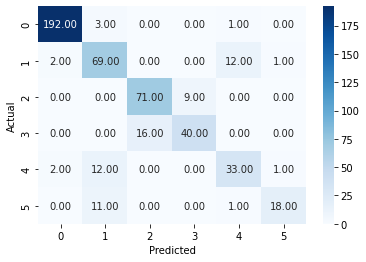

In [16]:
loss = classifier.evaluate_one(True, True, True)

In [18]:
# valid_dl.dataset.df['Miscls'] = idxs_mask.numpy().tolist()
# valid_dl.dataset.df['Miscls'].value_counts()

In [ ]:
# df_valid = valid_dl.dataset.df
# df_valid.head()

In [ ]:
# list_imgs_miscls = df_valid[df_valid['Miscls']==True]['image']
# list_imgs_miscls = [os.path.join(config.DATA.PATH, item) for item in list_imgs_miscls]

In [ ]:
# show_imgs(list_imgs_miscls[:10])

In [ ]:
# show_imgs(list_imgs_miscls[10:20])

In [ ]:
# df_unanno['pred'] = list(out_pred)
# df_unanno['pred'].value_counts()

In [ ]:
# df_unanno.to_csv("/kaggle/working/full_unlabeled_predict.csv", header =True, index = False)

In [ ]:
# classifier.fit()

In [ ]:
# classifier.save_checkpoint('/kaggle/working/')

In [ ]:
# classifier.load_checkpoint('/kaggle/working/06_29_2022_10_33_55_epoch_20.pth')

In [ ]:
# classifier.evaluate_one(True, True, True)